<h1><center>D208: Predictive Modeling</center></h1>
<br>
<center>Task 2: Logistic Regression</center>
<br>
<center>Michelle Nelson</center>
<br>
<center>Department of Information Technology, Western Governor's University</center>
<br>
<center>Dr. Eric Straw</center>
<br>
<center>January 15, 2024</center>
<br>
<br>
<br>
<br>

## A1. Research Question

Because logistic regression requires the response variable to be categorical, I am limited in the questions I can ask of the medical dataset, though this dataset does lend itself to logistic regression due to the large number of categorical variables it has. When I analyzed what factors might influence the length of hospital stay in my multiple linear regression paper, I found that the single most influencing factor was if the patient was a readmission. Thus, the question I want to ask for my logistic regression follows from the analysis performed on length of hospital stay: What factors influence readmission?

Decreasing the number of days hospitalized while also still providing quality care ensures that resources such as physicians, medical supplies, and time are not wasted and used efficiently. In addition, shortening days hospitalized should increase patient satisfaction scores so long as adequate time is still taken to care for the patient and they are not rushed out.

Since readmission is the single most influencing factor, a hospital would want to reduce readmission to attempt to achieve the goal of shortening length of hospital stay, since multiple linear regression found that readmission increases the length of hospital stays. Reducing readmission reduces the length of hospital stays, which could confer the benefits described above. However, reducing readmission has its own general benefits, according to Regis College. A high readmission rate is unfavorable for both the patient and the hospital. Lower readmission rates improve patient outcomes and satisfaction and high readmission rates strain physicians and waste time and resources (Regis College, 2022). 

## A2. Analysis Objectives and Goals
The goal of this logistic regression analysis is to identify which variables in the dataset influence readmission the most. In other words, I will attempt to use logistic regression to identify the explanatory variables that influence the response variable, ReAdmis. Identifying such factors allows the hospital to find ways to reduce readmission, which pertains to the goal of reducing length of hospital stay, as described above. Reducing readmission and thus also reducing length of hospital stay allows the hospital to be proactive in how it manages patients because at least some of the risk factors will be able to be identified at admission. Thus, it will be in the hospital's control to allocate resources adequately and efficiently, which should improve patient satisfaction as well as lower costs for the hospital.

## B1. Multiple Logistic Regression Model Assumptions

Multiple logistic regression operates on six assumptions, rather than four. Despite the rubric insisting on identifying four, I will note all six assumptions below because I believe it is important to highlight all of them rather than just four of them. It is important that all of the conditions are met. If any are violated, the model may be useless.

Assumption 1: The response variable has only two categories (Zach, 2020).

This assumption is straightforward. The response variable does not have to have options that are only yes or no, rather it can be any two options. Sex assigned at birth is a good example of this-- the options for this hypothetical variable would be male or female. So long as the response variable can only inhabit one of two categories, it is eligible to be a response variable.

Assumption 2: All the observations in the dataset are independent (Zach, 2020).

This assumption assumes no one observation is related to another. For example, if a data collector was tasked with collecting data on 50 individuals but accidentally surveyed 10 of the individuals twice by mistake, the observations that were included twice would be related to their matches and thus not independent. Data should be collected with a randomized design to prevent observations that are not independent.

Assumption 3: There is no multicollinearity, that is, no explanatory variable is closely correlated with another (Zach, 2020). 

If two variables are closely related to each other, you must remove one from the model. When two variables are multicollinear, a shift in one affects the other, so the model can't accurately estimate the change seen in the response variable for an explanatory variable independently of the variable with which it is multicollinear. In essence, multicollinear variables change together, and their effects on the response variable are hard to separate.

Assumption 4: Extreme outliers do not exist in the dataset (Zach, 2020).

Extreme outliers can negatively impact the fit of a logistic regression model because outliers tend to drag the regression line toward them. Thus, they shoudl be removed if they are erroneous. 

Assumption 5: There is a linear relationship between each explanatory variable and the logit of the response variable (Zach, 2020). 

The logit of the response variable is sometimes called the log odds ratio of the response variable. This is the log of the odds ratio, as the name implies. Thus, this assumption says that there is a linear relationship between each explanatory variable and the log of the following: the probability the response variable does occur divided by the probability that it doesn't.

Assumption 6: The sample size is large enough (Zach, 2020).

If the sample size is not large enough, valid conclusions cannot be drawn. There must be enough observations such that the target incidence for any given explanatory variable is enough to draw conclusions.

## B2. Benefits of Programming Language
For this analysis, I will be using Python. There are many reasons Python is ideal for a project such as this. Python is much more versatile than R, which was designed for statistics and data analysis. While that may make it sound like R is a better choice, Python is a versatile general-purpose language which means you can perform almost any data task with just Python and its packages, which all share a common syntax, unlike R (SudoPurge, 2021). Python is also faster than R in terms of how fast computationally intensive code can be run. Lastly, Python is very simple to read and write, giving it an edge over R.

Within Python, I will be using the following packages:

1. Matplotlib.pyplot: I will use matplotlib.pyplot in order to create graphs such as line graphs. This package is also often used in combination with seaborn.
2. Pandas: Pandas is useful because it allows us a framework for working with the data. Without it, using only numpy arrays would be rather clunky. Pandas allows the data to resemble a spreadsheet.
3. Numpy: In this case, I will be using numpy for certain mathematical operations like summing, squaring, or square rooting.
4. Seaborn: This package is handy in combination with matplotlib.pyplot because it expands the kinds of graphs we can use to plot the data. With seaborn, I can create scatterplots, plots with a line of best fit, and so on.
5. Statsmodels: This package and its sub-packages are useful for performing the actual logistic regression. It allows for the creation of regression models using the logit function. This package is also useful for calculating the variance inflation factor or VIF, which is used in checking for multicollinearity, which is an assumption that must not be violated.
6. Missingno: This package will be imported solely for data cleaning purposes. With the graph it provides, I can visually inspect the dataframe for missing data.
7. Plotnine: This will be used to create stacked bar charts for the bivariate visualizations section. I would do these in matplotlib/seaborn, but plotnine's version is the method I am most comfortable with.

## B3. Justification of Multiple Logistic Regression
If the choice of methods is between multiple linear regression and logistic regression, logistic regression must be used when attempting to find relationships between explanatory variables of any type and a categorical response variable. Since the response variable in my research question, ReAdmis, is a categorical variable, logistic regression must be analysis technique given these two choices. The response variable data type is the only differentiator between the two methods-- if the response variable in my research question had been continuous, I would have to pick multiple linear regression instead. Since I have many explanatory variables to examine, simple logistic regression is also not useful here. Simple logistic regression would be ideal if I had only one explanatory variable. Thus, multiple logistic regression is appropriate for my research question.

## C1. Data Cleaning and Preparation Goals
In this section, I will focus on my goals and steps to achieve said goals as they pertain solely to data cleaning. Any data wrangling tasks, such as one-hot encoding, will be discussed in section C4.

As with any dataset, there are four broad goals for data cleaning.

1. Identify and treat outliers.

Multiple logistic regression is sensitive to outliers. Outliers should only be kept if they seem reasonable given domain knowledge and common sense.  The function find_outliers_IQR() identifies outliers based on the interquartile range and its purpose is to help me be able to read boxplots, which are hard to read when there are hundreds of outliers represented by dots on either side of the "whiskers" in the plots. To identify outliers, the first step I took was to generate a boxplot for every applicable quantitative variable. If no outliers were present based on a visual inspection of the boxplot for each variable, I skipped using find_outliers_IQR(). If there were dots on either side of the boxplot "whiskers," however, I fed the variable into this function to get more details such as the specific ranges, values, and total number of outliers. This informed me enough to then make a judgment call on whether or not to keep the outliers, since not all outliers are inaccurate data.

Using a combination of boxplots to visually assess whether or not outliers exist and the custom function find_outliers_IQR(), I found outliers in Population, Children, Income, vitD_levels, Full_meals_eaten, VitD_supp, and Additional_charges. After inspecting the outlier ranges for each of these variables, I concluded that none of the outliers seemed outside of my expectations or erroneous in nature. The only variable I lack domain knowledge for is vitD_levels, but Vitamin D levels can range from below 12 ng/mL to over 50 ng/mL, and there are no islands of extremely high or low values that might imply that different units of measurement are the reason for these outliers (U.S. Department of Health and Human Services, 2022).

2. Identify and treat duplicates.

I used two methods to identify duplicates. First, I simply checked for uniqueness in customer_id, interaction, and UID. The data dictionary states that these variables should be unique in nature, thus I expected to get 10,000 as the count for each column, and I did. I used this step in an attempt to find duplicate customers where data might differ between the identical customer_ids. The second method I used was calling .duplicated.value_counts() to check for complete duplicates, where the information in every column for one record is the same as another record. This returned 10,000 false, meaning it found no complete duplicates.

3. Identify and treat missing data.

Once again, I used two methods to check for missing data. First, I checked df.info() for the non-null count column. If there are no missing datapoints, every row should show 10,000 non-null, which was indeed the case. Just for good measure, I also used msno.matrix to provide a visual representation of how complete the dataset was. This visual representation showed black bars for every column with no white lines across the bars indicating a missing value. Thus, I determined there are no missing datapoints.

4. Ensure that the columns of the dataframe are stored as the correct datatype and that categories are not superfluous.

Since the dataset was stored as a CSV, many of the column datatypes were incorrect upon import. This was identified using df.info(), which shows the datatype for each column. I compared this to the data dictionary and made a determination on how each column should be stored. To check for superfluous categories in categorical variables, I used .value_counts and a visual inspection. 

Variables that were incorrect included the following. Zip codes were stored as integers and thus had leading zeros missing, timezones had far too many superfluous categories that could be stored as the commonly known US timezones instead (Eastern, Central, etc,) initial_days, totalCharge, and additional_charges are all far too precise, the variables following the naming convention Item# were incorrectly stored as integers when they should be ordered categorical variables, and many of the categorical variables were stored as strings instead of the category datatype.

To clean up the zip codes, I converted these to the string datatype and filled the beginning with zeros for a maximum of five characters.

For the timezones, I created a dictionary that maps the existing categories to the more commonly known timezones such as eastern, central, mountain, and so on. After having done that, I converted the column to the category datatype.

Initial_Days was converted to the integer datatype and totalCharge and and additional_charges were rounded to the appropriate number of decimal points. Since totalCharge and additional_charges are monetary values, they were rounded to two decimal points.

All the variables following the naming convention Item# were converted to the ordered categorical datatype to prevent out-of-bounds entries.

Lastly, all of the categorical variables stored as strings were converted to the category datatype. This helps preserve data integrity.

While there are still more issues to treat, these are the ones that pertain solely to data cleaning. Much of the code you will find below is very similar to the code used for my D206 project. Goals that will be further described in **section C4** include the re-expression of the yes/no categorical variables as numeric, creating dummy variables for nominal categorical variables, and creating a new dataframe that will hold only the variables of interest for multiple logistic regression. I consider these goals to pertain more to data wrangling and transformation.

Please use the attached ipynb file as the executable code required by this section.

### Cleaning Detection Code

In [1]:
#[In-Text Citation: (Nelson, 2023).]
import pandas as pd
from pandas.api.types import CategoricalDtype
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import qqplot
from statsmodels.formula.api import logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
import plotnine as p9

#load csv into pandas dataframe. The CSV's first column is an index, so we let pandas know that too.
df=pd.read_csv('C:/Users/essay/Documents/D208 PA Dataset/medical_clean.csv', index_col = 0)

#visually inspect dataframe's datatypes and size to ensure it loaded properly.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
# Visually inspect dataframe to ensure data loaded as expected and do initial visual exploration
pd.set_option("display.max_columns", None)
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,America/Chicago,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5.957250,2636.691180,12742.589910,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,America/New_York,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9.058210,3694.627161,16815.513600,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,America/New_York,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14.228019,3021.499039,6930.572138,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,America/Chicago,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6.180339,2968.402860,8363.187290,3,3,2,3,3,3,4,2


In [3]:
# define function for outlier detection throughout the following code. [In-Text Citation: (Kleppen, 2023).]
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [4]:
# Check uniqueness constraints on Customer_id, Interaction, and UID all at once using for loop
# I expect 10,000 records for each. If 10,000 is the result for each, then I have no duplicates.
unique_cols = df[['Customer_id', 'Interaction', 'UID']]
for col in unique_cols:
    print(col)
    print(unique_cols[col].value_counts().count())

Customer_id
10000
Interaction
10000
UID
10000


In [5]:
# Identify complete duplicates, if any
print(df.duplicated().value_counts())

False    10000
dtype: int64


In [6]:
# Check if data seems reasonable
df.Population.describe()

count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

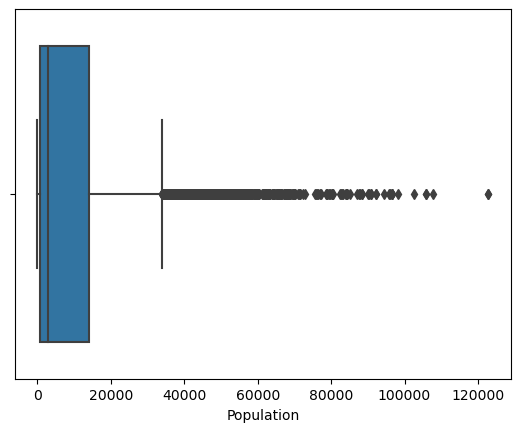

In [7]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Population', data = df)

In [8]:
# Get number of outliers, their value range, and also the whole list of them.
outliers_pop = find_outliers_IQR(df['Population'])
print("number of outliers: " + str(len(outliers_pop)))
print("outliers between: " + str(outliers_pop.min()) + " and " + str(outliers_pop.max()))
pd.set_option("display.max_rows", None)
outliers_pop

number of outliers: 855
outliers between: 33894 and 122814


CaseOrder
9         40029
12        35369
33        40051
38        38835
71        40824
79        49034
89        45736
100       43706
109       36119
116       39711
119       48483
154       56458
161       62718
164       60238
183       35035
207       41440
228       34225
231       59191
244       65151
248       53211
252       34839
264       35388
269       35102
289       54453
312       41503
317       34311
323       39946
325       36986
327       39786
337       54776
346       33908
366       55361
394       69802
399       35690
412       47231
415       47247
420       40837
423       60191
441       49907
442       38406
464       39985
470       68796
476       36158
485       41973
499       44571
502       36260
532       70199
584       52117
592       59129
595       57955
596       37988
602       42045
612       90761
622       71587
626       36792
639       34503
645       36154
658       63177
660       64197
664       42821
666       40532
667       3464

In [9]:
# Check for superfluous/typoed categories
df.Area.value_counts()

Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64

In [10]:
# Check for superfluous/typoed categories
df.TimeZone.value_counts()

America/New_York                  3889
America/Chicago                   3771
America/Los_Angeles                937
America/Denver                     612
America/Detroit                    262
America/Indiana/Indianapolis       151
America/Phoenix                    100
America/Boise                       86
America/Anchorage                   50
America/Puerto_Rico                 43
Pacific/Honolulu                    34
America/Menominee                   14
America/Nome                        12
America/Indiana/Vincennes            8
America/Kentucky/Louisville          6
America/Sitka                        6
America/Toronto                      5
America/Indiana/Marengo              3
America/Indiana/Tell_City            3
America/North_Dakota/Beulah          2
America/Yakutat                      1
America/Indiana/Winamac              1
America/Indiana/Knox                 1
America/North_Dakota/New_Salem       1
America/Indiana/Vevay                1
America/Adak             

In [11]:
# Check for superfluous/typoed categories
df.Job.value_counts()

Outdoor activities/education manager                           29
Exhibition designer                                            27
Theatre director                                               27
Scientist, audiological                                        26
Toxicologist                                                   25
Research scientist (life sciences)                             25
Orthoptist                                                     25
Technical sales engineer                                       25
Astronomer                                                     25
Estate agent                                                   25
Marketing executive                                            25
Production assistant, radio                                    25
Neurosurgeon                                                   25
Lobbyist                                                       25
Jewellery designer                                             25
Broadcast 

In [12]:
# Check that data seems reasonable
df.Children.describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

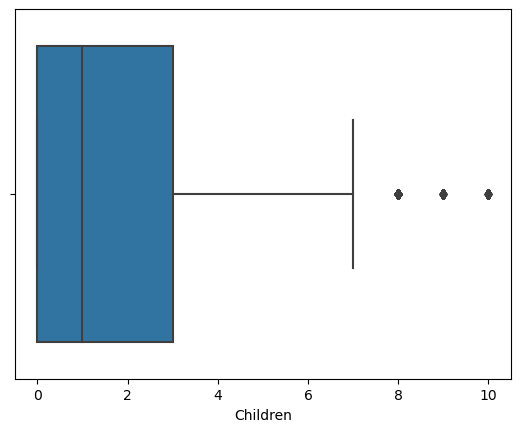

In [13]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Children', data = df)

In [14]:
# Get number of outliers, their value range, and also the whole list of them.
outliers_children = find_outliers_IQR(df['Children'])
print("number of outliers: " + str(len(outliers_children)))
print("outliers between: " + str(outliers_children.min()) + " and " + str(outliers_children.max()))
pd.set_option("display.max_rows", None)
outliers_children

number of outliers: 411
outliers between: 8 and 10


CaseOrder
17       10
42        8
64        8
80        9
147       9
156       8
157      10
171       8
175       8
181      10
186      10
189       8
207       8
220      10
249       8
254       8
263       8
278       8
289       9
325       9
362       9
374       8
376       9
428       8
431       8
447      10
450       9
488       9
513       8
567       8
585       8
588       8
598      10
609       9
613       8
747       8
784       9
802      10
809       8
814       8
822       8
835       9
846       8
915       9
959       8
968       9
980       8
1002      8
1038      8
1048      8
1049      9
1076      8
1094     10
1139      8
1149      8
1169      8
1171      9
1188      9
1329     10
1394     10
1421      8
1436      8
1470      9
1507      8
1523      8
1536      8
1568      8
1570     10
1574     10
1586     10
1624     10
1634      8
1637      9
1722     10
1727      9
1753      8
1776     10
1822      8
1904      9
1962      8
2014     10
2055     10
2069  

In [15]:
# Check that data seems reasonable
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

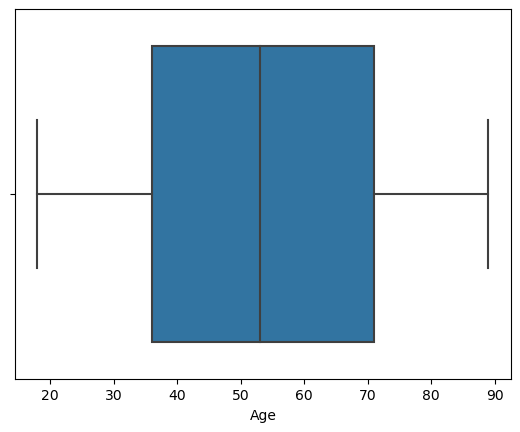

In [16]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Age', data = df)

In [17]:
# Check that data seems reasonable
df.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

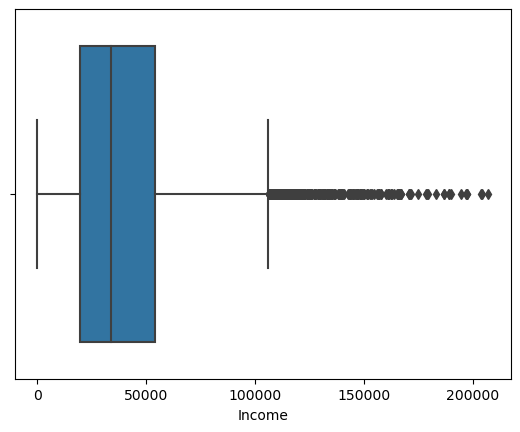

In [18]:
# Max seems reasonable, but min seems low. Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Income', data = df)

In [19]:
# Get number of outliers, their value range, and also the whole list of them.
outliers_Income = find_outliers_IQR(df['Income'])
print("number of outliers: " + str(len(outliers_Income)))
print("outliers between: " + str(outliers_Income.min()) + " and " + str(outliers_Income.max()))
pd.set_option("display.max_rows", None)
outliers_Income

number of outliers: 326
outliers between: 106521.92 and 207249.1


CaseOrder
31      167105.10
37      122615.82
59      132963.95
64      128855.39
78      135288.23
87      114525.82
174     178470.63
181     128959.11
191     131682.02
220     146378.38
249     108278.74
362     136468.34
408     121385.63
418     132010.48
529     118099.72
556     108279.93
583     125977.37
612     128108.35
623     171288.05
723     113672.54
733     124905.92
765     110089.13
835     112201.29
842     204542.41
872     107115.94
896     116478.20
904     129098.71
918     129123.73
958     106521.92
963     138456.69
985     116583.66
1040    111242.16
1063    110046.56
1074    120273.05
1096    116549.66
1106    120700.01
1109    167286.62
1342    129987.32
1353    109948.46
1373    127505.80
1472    147570.86
1515    121766.35
1534    116654.47
1560    108990.15
1591    158173.60
1651    110189.06
1666    119102.35
1678    117236.40
1724    148809.86
1779    197576.18
1801    133047.11
1813    111165.94
1846    114487.23
1892    113659.99
1907    112927.61


In [20]:
# Check for superfluous/typoed categories
df.Marital.value_counts()

Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64

In [21]:
# Check for superfluous/typoed categories
df.Gender.value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [22]:
# Check that all are Yes or No (or NaN, determined earlier)
df.ReAdmis.value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

In [23]:
# Check that data seems reasonable
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

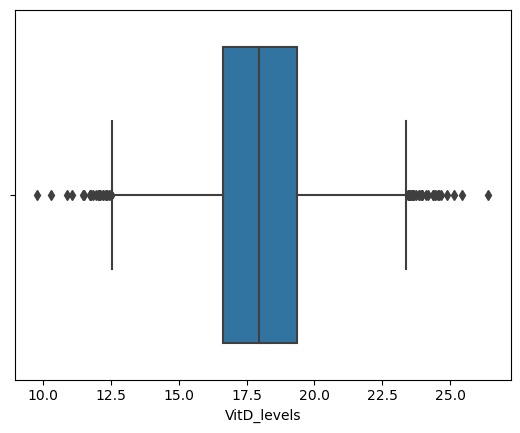

In [24]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'VitD_levels', data = df)

In [25]:
# Get number of outliers and the whole list of them. Since two ranges, upper and lower, sort to better see those ranges.
outliers_VitD = find_outliers_IQR(df['VitD_levels'])
print("outliers between: " + str(outliers_VitD.min()) + " and " + str(outliers_VitD.max()))
print("number of outliers: " + str(len(outliers_VitD)))
pd.set_option("display.max_rows", None)
outliers_VitD.sort_values()

outliers between: 9.806483 and 26.39444871
number of outliers: 60


CaseOrder
8141     9.806483
3289    10.315234
1316    10.877427
5259    11.083430
636     11.475314
5066    11.538730
9271    11.751060
8492    11.755560
510     11.785395
7188    11.846830
6793    11.966340
9510    12.038470
4382    12.062467
1629    12.072534
4260    12.074147
1440    12.091658
8198    12.118830
3503    12.207388
7226    12.219040
813     12.313590
9048    12.317130
338     12.325488
4650    12.355875
791     12.433745
7288    12.507730
9788    12.509160
1542    12.509970
1538    23.442725
2616    23.453194
9512    23.476530
1349    23.501133
6579    23.505870
4225    23.507827
5340    23.524230
6065    23.527640
6673    23.531320
3492    23.593703
9224    23.615650
8022    23.624500
65      23.662948
8576    23.739160
7158    23.833530
2705    23.852194
468     23.906407
3564    23.938421
1664    23.941426
8844    24.098840
8409    24.166720
6948    24.356250
2383    24.371580
4530    24.421656
8349    24.450370
8851    24.538710
508     24.559132
23      24.565463


In [26]:
# Check that data seems reasonable
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

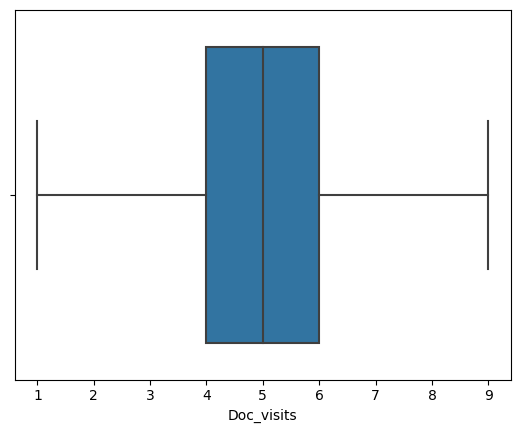

In [27]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Doc_visits', data = df)

In [28]:
# Check that data seems reasonable
df.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

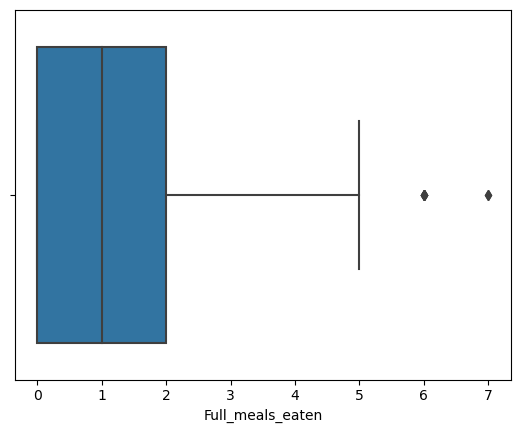

In [29]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Full_meals_eaten', data = df)

In [30]:
# Get number of outliers, their value range, and also the whole list of them.
outliers_meals = find_outliers_IQR(df['Full_meals_eaten'])
print("number of outliers: " + str(len(outliers_meals)))
print("outliers between: " + str(outliers_meals.min()) + " and " + str(outliers_meals.max()))
pd.set_option("display.max_rows", None)
outliers_meals

number of outliers: 8
outliers between: 6 and 7


CaseOrder
959     7
1232    6
2185    6
4710    7
6069    6
7218    6
8145    6
9987    6
Name: Full_meals_eaten, dtype: int64

In [31]:
# Check that data seems reasonable
df.vitD_supp.describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

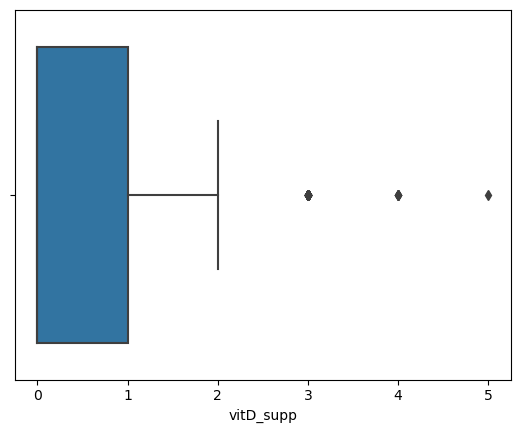

In [32]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'vitD_supp', data = df)

In [33]:
# Get number of outliers, their value range, and also the whole list of them.
outliers_supp = find_outliers_IQR(df['vitD_supp'])
print("number of outliers: " + str(len(outliers_supp)))
print("outliers between: " + str(outliers_supp.min()) + " and " + str(outliers_supp.max()))
pd.set_option("display.max_rows", None)
outliers_supp

number of outliers: 70
outliers between: 3 and 5


CaseOrder
63      3
64      3
207     3
250     3
838     3
1049    3
1343    4
1474    3
1661    3
1676    3
1713    3
1753    3
2129    3
2152    3
2309    3
2359    3
2534    4
2716    4
2957    3
3132    5
3216    3
3263    3
3494    3
3628    3
3815    3
3901    3
4003    3
4069    3
4159    3
4164    3
4297    3
4399    3
4407    3
4568    3
4845    3
4861    3
5000    3
5045    3
5217    3
5352    3
5534    3
5584    3
6217    3
6385    3
6416    3
6525    3
6733    3
7150    3
7181    4
7216    3
7218    3
7344    3
7413    3
7472    3
7474    3
7707    3
7890    3
8070    3
8246    3
8300    3
8350    3
8406    3
8494    3
8653    3
9016    3
9092    4
9590    3
9791    3
9909    3
9983    3
Name: vitD_supp, dtype: int64

In [34]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Soft_drink.value_counts()

No     7425
Yes    2575
Name: Soft_drink, dtype: int64

In [35]:
# Check for superfluous/typoed categories
df.Initial_admin.value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

In [36]:
# Check that all are Yes or No (or NaN, determined earlier)
df.HighBlood.value_counts()

No     5910
Yes    4090
Name: HighBlood, dtype: int64

In [37]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Stroke.value_counts()

No     8007
Yes    1993
Name: Stroke, dtype: int64

In [38]:
# Check for superfluous/typoed categories
df.Complication_risk.value_counts()

Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

In [39]:
# Check that all are Yes or No
df.Overweight.value_counts()

Yes    7094
No     2906
Name: Overweight, dtype: int64

In [40]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Arthritis.value_counts()

No     6426
Yes    3574
Name: Arthritis, dtype: int64

In [41]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Diabetes.value_counts()

No     7262
Yes    2738
Name: Diabetes, dtype: int64

In [42]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Hyperlipidemia.value_counts()

No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64

In [43]:
# Check that all are Yes or No (or NaN, determined earlier)
df.BackPain.value_counts()

No     5886
Yes    4114
Name: BackPain, dtype: int64

In [44]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Anxiety.value_counts()

No     6785
Yes    3215
Name: Anxiety, dtype: int64

In [45]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Allergic_rhinitis.value_counts()

No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64

In [46]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Reflux_esophagitis.value_counts()

No     5865
Yes    4135
Name: Reflux_esophagitis, dtype: int64

In [47]:
# Check that all are Yes or No (or NaN, determined earlier)
df.Asthma.value_counts()

No     7107
Yes    2893
Name: Asthma, dtype: int64

In [48]:
# Check for superfluous/typoed categories
df.Services.value_counts()

Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: Services, dtype: int64

In [49]:
# Check that data seems reasonable
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

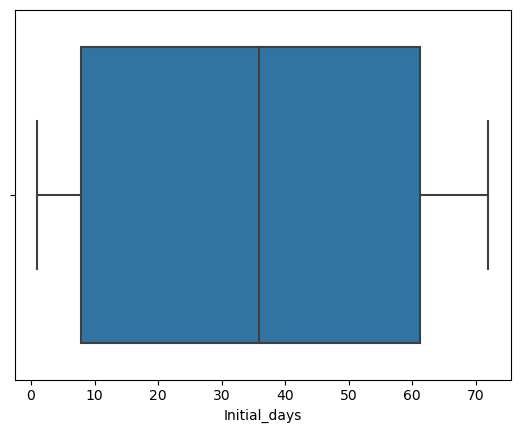

In [50]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Initial_days', data = df)

In [51]:
# Check that data seems reasonable
df.TotalCharge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

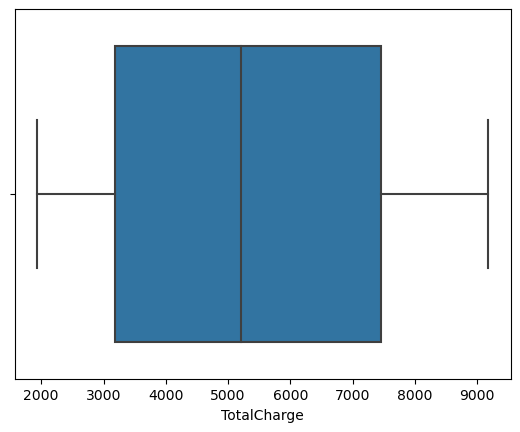

In [52]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'TotalCharge', data = df)

In [53]:
# Check that data seems reasonable
df.Additional_charges.describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

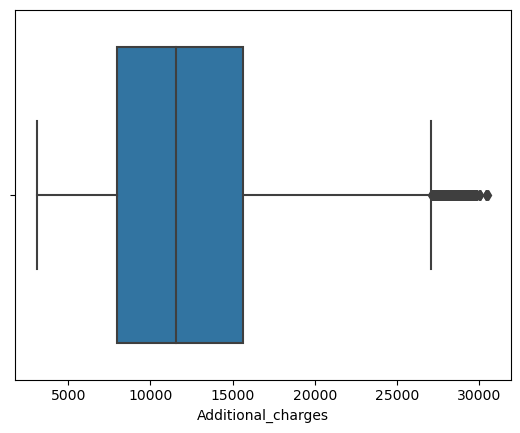

In [54]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Additional_charges', data = df)

In [55]:
# Get number of outliers, their value range, and also the whole list of them.
outliers_addl = find_outliers_IQR(df['Additional_charges'])
print("number of outliers: " + str(len(outliers_addl)))
print("outliers between: " + str(outliers_addl.min()) + " and " + str(outliers_addl.max()))
pd.set_option("display.max_rows", None)
outliers_addl

number of outliers: 424
outliers between: 27088.15 and 30566.07


CaseOrder
21      28788.08031
82      28102.95750
102     28297.97033
103     29021.25261
115     28830.32716
155     28961.00586
185     28963.52738
216     27472.01292
242     27133.74812
272     29795.62246
294     27940.29515
369     28673.17177
378     27472.77004
389     27671.18182
398     27482.80771
431     29198.85776
452     28987.60257
462     27973.91489
472     28212.61312
486     30087.65094
498     28983.36505
502     27455.33202
537     28990.15443
575     27988.16448
605     29222.45308
613     28548.00003
629     28794.22431
634     28726.75105
680     29083.23523
686     28831.20614
688     27682.48218
718     29096.08237
722     28112.53552
726     27963.53338
732     27891.41761
750     29837.70749
760     27127.60412
769     27162.54641
787     28276.68820
797     27162.54641
852     27165.09827
862     28765.52579
879     27430.74090
895     27401.70104
899     29544.95222
952     29223.41830
962     28187.40490
989     27553.79336
1027    27861.35972
1037    29

In [56]:
# Ensure data is restricted to categories 1 through 8
df.Item1.value_counts()

4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: Item1, dtype: int64

In [57]:
# Ensure data is restricted to categories 1 through 8
df.Item2.value_counts()

3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: Item2, dtype: int64

In [58]:
# Ensure data is restricted to categories 1 through 8
df.Item3.value_counts()

4    3464
3    3379
5    1358
2    1356
6     220
1     211
7      11
8       1
Name: Item3, dtype: int64

In [59]:
# Ensure data is restricted to categories 1 through 8
df.Item4.value_counts()

3    3422
4    3394
5    1388
2    1346
6     231
1     207
7      12
Name: Item4, dtype: int64

In [60]:
# Ensure data is restricted to categories 1 through 8
df.Item5.value_counts()

4    3446
3    3423
2    1380
5    1308
6     219
1     211
7      13
Name: Item5, dtype: int64

In [61]:
# Ensure data is restricted to categories 1 through 8
df.Item6.value_counts()

4    3464
3    3371
5    1403
2    1319
6     220
1     213
7      10
Name: Item6, dtype: int64

In [62]:
# Ensure data is restricted to categories 1 through 8
df.Item7.value_counts()

4    3487
3    3456
2    1345
5    1274
1     215
6     212
7      11
Name: Item7, dtype: int64

In [63]:
# Ensure data is restricted to categories 1 through 8
df.Item8.value_counts()

3    3401
4    3337
5    1429
2    1391
6     221
1     209
7      12
Name: Item8, dtype: int64

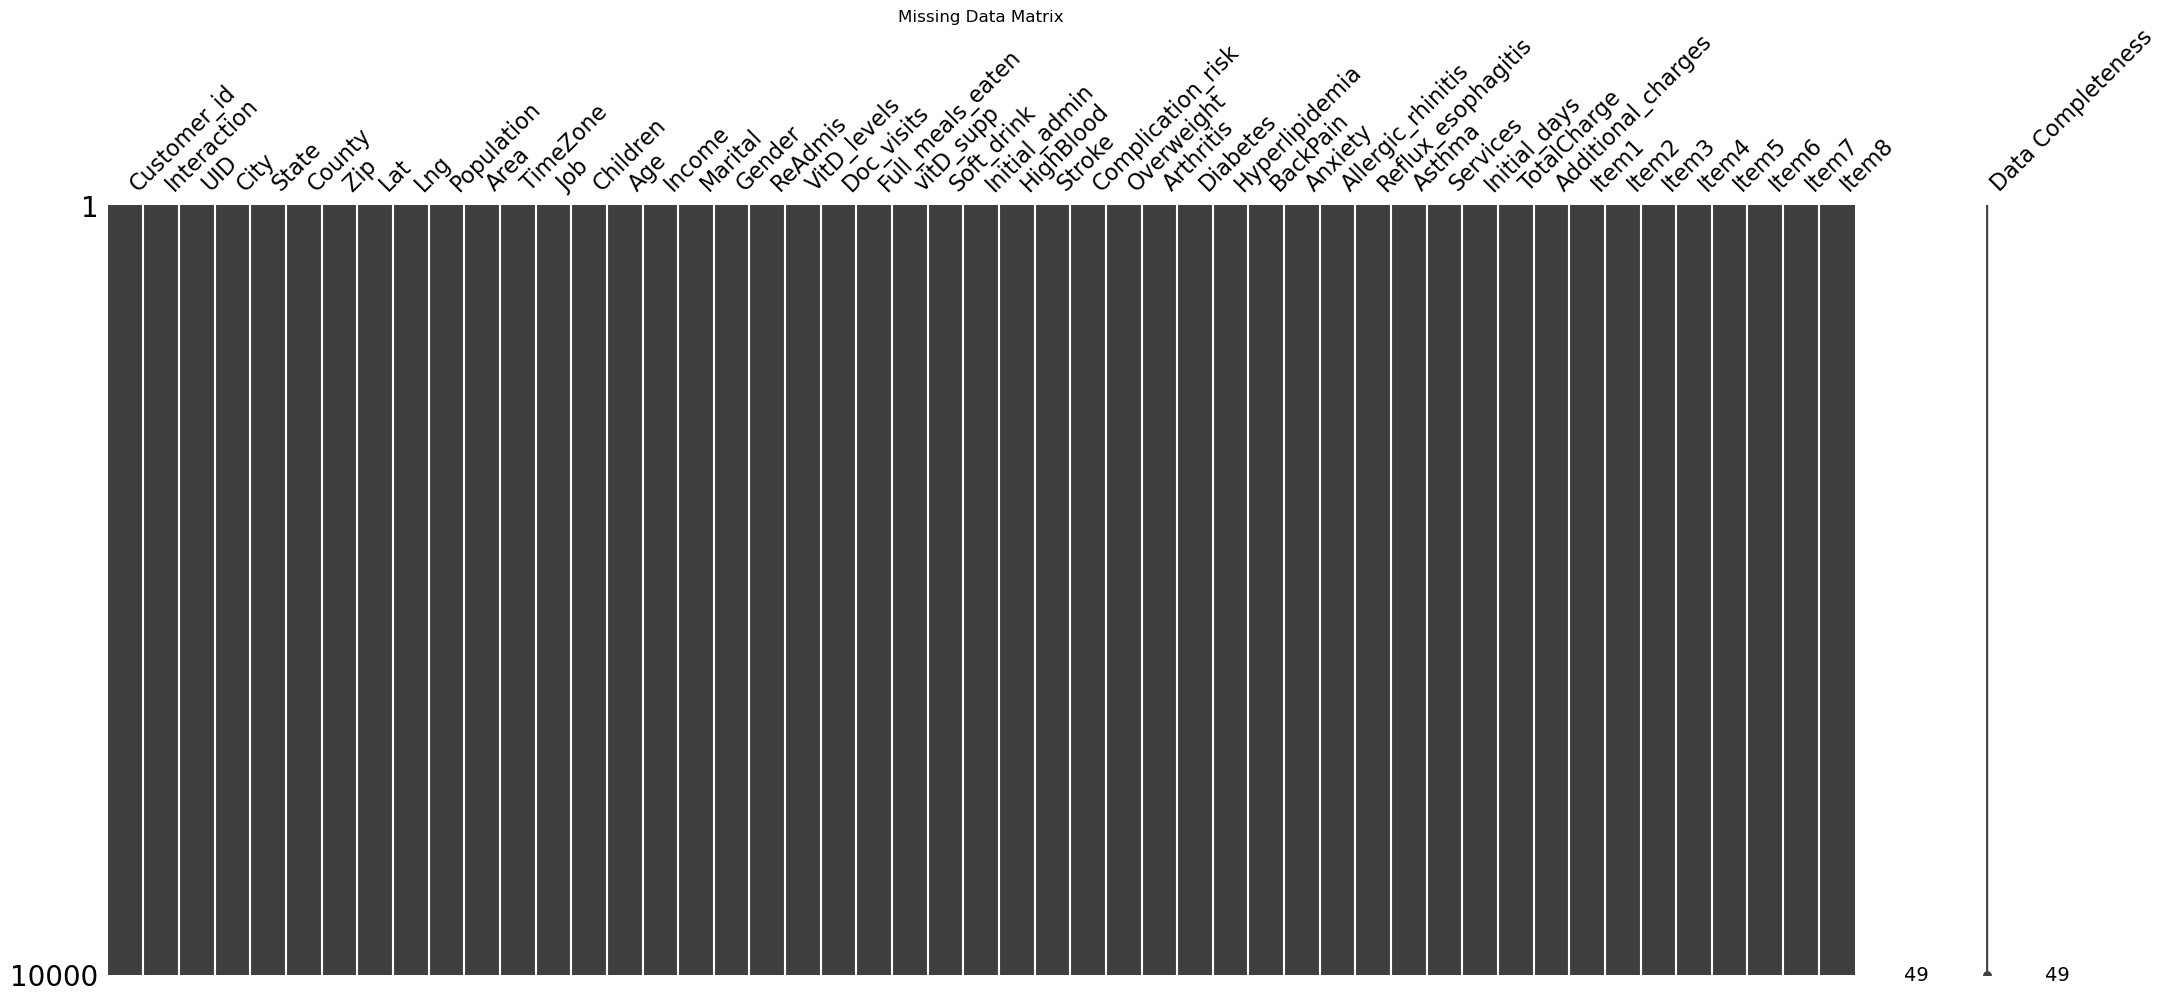

In [64]:
# Visually identify columns with missing data, determine randomness

"""
There are compatibility issues between matplotlib and missingno, detailed below.
You must run either missingno ver. 0.5.2 and the latest ver. of matplotlib, or 
missingno ver. 0.4.2 and matplotlib ver. 3.6.2
Anaconda only allows missingno ver. 0.4.2 at this time, forcing me to use matplotlib ver. 3.6.2.
"""
# Visually inspect missing data as it is ordered originally
msno.matrix(df, labels = True)
plt.title('Missing Data Matrix')
plt.show()

### Cleaning Treatment Code

In [65]:
#Clean datatypes up using code from D206 PA. 
#[In-Text Citation: (Nelson, 2023).]

# Convert Zip to string from integer.
df['Zip'] = df['Zip'].astype('str')
# Add leading zeros using zfill()
df['Zip'] = df['Zip'].str.zfill(5)
# Identify columns that can be converted all at once to category datatype using for loop.
category_cols = df[['Area', 'Marital', 'Initial_admin', 'Complication_risk', 'Services', 'ReAdmis',
                         'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                         'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]
# Will do Item# columns later since they require an order. Timezone needs a dict written, will do that later too.
for col in category_cols:
    df[col] = df[col].astype('category')
# Write dictionary for option reduction for Timezone column
mapping_timezone = {'America/Puerto_Rico' : 'Atlantic',
          'America/New_York' : 'Eastern',
          'America/Detroit' : 'Eastern',
          'America/Indiana/Indianapolis' : 'Eastern',
          'America/Indiana/Vevay' : 'Eastern',
          'America/Indiana/Vincennes' : 'Eastern',
          'America/Kentucky/Louisville' : 'Eastern',
          'America/Toronto' : 'Eastern',
          'America/Indiana/Marengo' : 'Eastern',
          'America/Indiana/Winamac' : 'Eastern',
          'America/Chicago' : 'Central',
          'America/Menominee' : 'Central',
          'America/Indiana/Knox' : 'Central',
          'America/Indiana/Tell_City' : 'Central',
          'America/North_Dakota/Beulah' : 'Central',
          'America/North_Dakota/New_Salem' : 'Central',
          'America/Denver' : 'Mountain',
          'America/Boise' : 'Mountain',
          'America/Phoenix' : 'Mountain',
          'America/Los_Angeles' : 'Pacific',
          'America/Nome' : 'Alaskan',
          'America/Anchorage' : 'Alaskan',
          'America/Sitka' : 'Alaskan',
          'America/Yakutat' : 'Alaskan',
          'America/Adak' : 'Hawaiian',
          'Pacific/Honolulu' : 'Hawaiian'
          }
# Use dictionary to convert timezone options.
df.TimeZone.replace(mapping_timezone, inplace=True)
# Convert timezone to category datatype.
df['TimeZone'] = df['TimeZone'].astype('category')
# Convert gender to category datatype.
df['Gender'] = df['Gender'].astype('category')
# Convert Overweight to category datatype.
df['Overweight'] = df['Overweight'].astype('category')
# Convert Anxiety to category datatype.
df['Anxiety'] = df['Anxiety'].astype('category')

# Create ordered categories for Item# variables. 8 is "least important" and 1 is "most important"
survey_scores = CategoricalDtype(categories=['8', '7', '6', '5', '4', '3', '2', '1'], ordered=True)
# Identify columns that need to become ordered categorical
ord_cat_cols = df[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]
# Create for loop to convert columns above to string (issues if not string first,) then ordered categorical datatype.
for col in ord_cat_cols:
    df[col] = df[col].astype('str')
    df[col] = df[col].astype(survey_scores)
# convert Initial_days to an integer.
df['Initial_days'] = df['Initial_days'].astype('int64')
# Round TotalCharge to 2 decimal places
df['TotalCharge'] = df.TotalCharge.round(2)
# Round Additional_charges to 2 decimal places
df['Additional_charges'] = df.Additional_charges.round(2)

In [66]:
#Re-inspect dataframe to see if changes took.
df.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_id         10000 non-null  object  
 1   Interaction         10000 non-null  object  
 2   UID                 10000 non-null  object  
 3   City                10000 non-null  object  
 4   State               10000 non-null  object  
 5   County              10000 non-null  object  
 6   Zip                 10000 non-null  object  
 7   Lat                 10000 non-null  float64 
 8   Lng                 10000 non-null  float64 
 9   Population          10000 non-null  int64   
 10  Area                10000 non-null  category
 11  TimeZone            10000 non-null  category
 12  Job                 10000 non-null  object  
 13  Children            10000 non-null  int64   
 14  Age                 10000 non-null  int64   
 15  Income              10000 non-null  

In [67]:
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,Central,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10,3726.70,17939.40,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,Central,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15,4193.19,17613.00,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,Central,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4,2434.23,17505.19,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,Central,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1,2127.83,12993.44,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,Eastern,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1,2113.07,3716.53,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,Central,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5,2636.69,12742.59,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,Eastern,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9,3694.63,16815.51,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,Eastern,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14,3021.50,6930.57,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,Central,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6,2968.40,8363.19,3,3,2,3,3,3,4,2


## C2. Data Exploration Using Summary Statistics
For this multiple logistic regression analysis, I will use ReAdmis as my response variable, y. Below the response variable, you will also see the explanatory variables (x) I have chosen for my initial model. Since I am performing these summary statistics before data wrangling and transformation, .describe() will only be used for the quantitative variables. This will provide the mean, median, and mode for such variables. For the categorical variables, which are non-numeric since data wrangling has yet to be performed, I will use .value_counts() to summarize them instead.

In [68]:
# Summary stats for response variable, ReAdmis
df.ReAdmis.value_counts(normalize=True)

No     0.6331
Yes    0.3669
Name: ReAdmis, dtype: float64

#### Readmission
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. Above, you can see that roughly 63% of patients are not readmission cases while about 37% are. While I am uncertain what the average readmission rate for a hospital is due to lack of domain knowledge, 37% seems quite high to me.

In [69]:
# Summary stats for explanatory variable Age
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

#### Age
In the above summary statistics for age, we can see the mean, or average, is 53.5117 years old, which means many patients who are hospitalized are about 53.5117 years old. The mean is calculated by adding up each age of each patient in the dataset and dividing by the total number of patients. The median of the dataset, also known as the middle value when you order the days hospitalized from smallest to largest, is 53 years old. In this case, the mean and median are very similar. This indicates that the distribution is fairly symmetrical, with little skew. The standard deviation of this variable is 20.638538 years. As aforementioned, standard deviation measures how much variation from the mean is typical. Again, we can use standard deviation to say that 68% of the data will fall within 1 standard deviation from the mean, meaning that for this dataset, 68% of patients will be between the ages of 32.873 and 74.149. The range, however, shows patients have a minimum age of 18 and a maximum age of 89 years old. This means that no children are present in our dataset, even if they do get hospitalized from time to time.

In [70]:
# Value Counts for explanatory variable Gender
df.Gender.value_counts(normalize=True)

Female       0.5018
Male         0.4768
Nonbinary    0.0214
Name: Gender, dtype: float64

#### Gender
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. Above, you can see that roughly 50% of patients are female, 48% (rounding up) are male, and 2% are non-binary. This falls within the realm of what I would expect. Generally speaking, the population is roughly 50% male and 50% female, with a much smaller percentage of people who identify as non-binary. People of all genders have emergencies, surgeries, and other issues, so I would expect to see this result from hospital demographics.

In [71]:
# Value Counts for explanatory variable Initial_admin
df.Initial_admin.value_counts(normalize=True)

Emergency Admission      0.5060
Elective Admission       0.2504
Observation Admission    0.2436
Name: Initial_admin, dtype: float64

#### Initial admin
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. Roughly 51% of patients are admitted as emergencies, 25% as elective admissions, and 24% as observation admissions. Having little domain knowledge, I would have expected emergency admissions to be higher, since hospitals are generally for emergency situations. One is probably more likely to seek care at an urgent care facility or primary care physician if the issue presenting itself is not an emergency.

In [72]:
# Value Counts for explanatory variable Stroke
df.Stroke.value_counts(normalize=True)

No     0.8007
Yes    0.1993
Name: Stroke, dtype: float64

#### Stroke
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. This table shows that about 80% of patients admitted have not had a stroke in the past while about 20% have.

In [73]:
# Value Counts for explanatory variable Complication_risk
df.Complication_risk.value_counts(normalize=True)

Medium    0.4517
High      0.3358
Low       0.2125
Name: Complication_risk, dtype: float64

#### Complication Risk
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. In the above table, about 21% of patients admitted have a low complication risk, 45% have a medium risk, and about 34% have high risk.

In [74]:
# Value Counts for explanatory variable Anxiety
df.Anxiety.value_counts(normalize=True)

No     0.6785
Yes    0.3215
Name: Anxiety, dtype: float64

#### Anxiety
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. Above, you can see that about 68% of people admitted do not have anxiety while 32% have a history of having an anxiety disorder.

In [75]:
# Value Counts for explanatory variable Services
df.Services.value_counts(normalize=True)

Blood Work     0.5265
Intravenous    0.3130
CT Scan        0.1225
MRI            0.0380
Name: Services, dtype: float64

#### Services
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. Patients admitted receive four types of services: blood work, intravenous injection, CT scans, and MRIs. Of those admitted, roughly 53% receive blood work, 31% receive intravenous injection, 12% get CT scans, and 4% are subjected to an MRI.

In [76]:
# Value Counts for explanatory variable HighBlood
df.HighBlood.value_counts(normalize=True)

No     0.591
Yes    0.409
Name: HighBlood, dtype: float64

#### High Blood Pressure
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. This table shows that about 41% of patients admitted have high blood pressure, while about 59% do not.

In [77]:
# Value Counts for explanatory variable Diabetes
df.Diabetes.value_counts(normalize=True)

No     0.7262
Yes    0.2738
Name: Diabetes, dtype: float64

#### Diabetes
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. Roughly 73% of people admitted do not have diabetes while 27% of them do.

In [78]:
# Value Counts for explanatory variable Diabetes
df.Overweight.value_counts(normalize=True)

Yes    0.7094
No     0.2906
Name: Overweight, dtype: float64

#### Overweight
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. This table shows that about 29% of people admitted are not overweight but about 71% are.

In [79]:
# Value Counts for explanatory variable BackPain
df.BackPain.value_counts(normalize=True)

No     0.5886
Yes    0.4114
Name: BackPain, dtype: float64

#### Back Pain
Because this variable has not yet been converted to a numeric form in the data wrangling step of C4, I will use a table to describe it instead. I have added an argument to .value_counts to convert the raw counts to percentages in the form of a decimal. This table shows that about 59% of people admitted do not have chronic back pain but 41% do.

## C3. Univariate and Bivariate Visualizations
### Univariate Visualizations
Below, we will the response variable, ReAdmis first, followed by all of the explanatory variables chosen for the initial model.

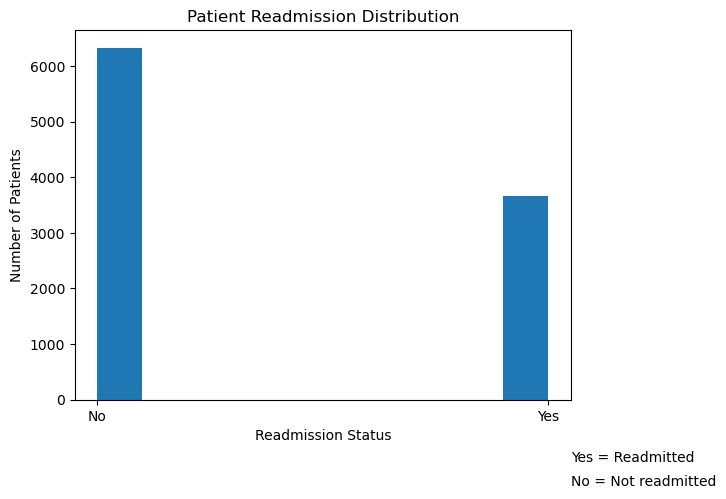

In [80]:
plt.hist(data=df, x="ReAdmis")
plt.title("Patient Readmission Distribution")
plt.xlabel("Readmission Status")
plt.ylabel("Number of Patients")
plt.figtext(0.9, -0.02, "Yes = Readmitted", ha="left")
plt.figtext(0.9, -0.07, "No = Not readmitted", ha="left")
plt.show()

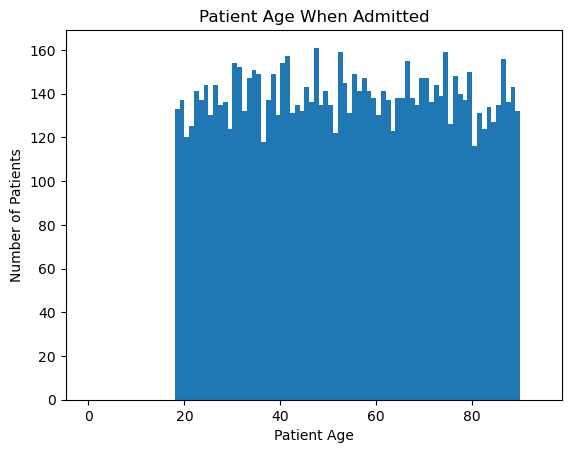

In [81]:
plt.hist(data=df, x="Age", bins=np.arange(0,95,1))
plt.title("Patient Age When Admitted")
plt.xlabel("Patient Age")
plt.ylabel("Number of Patients")
plt.show()

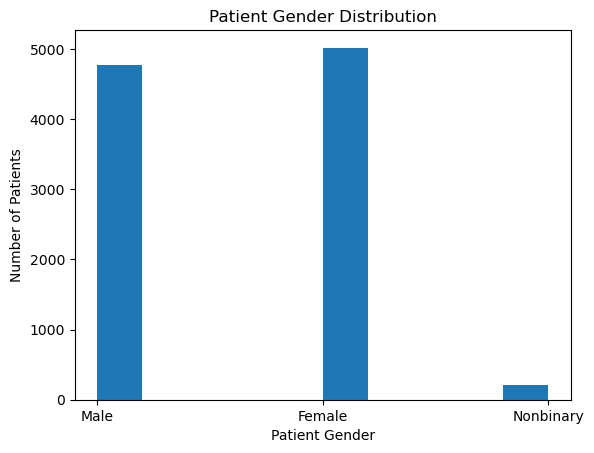

In [82]:
plt.hist(data=df, x="Gender")
plt.title("Patient Gender Distribution")
plt.xlabel("Patient Gender")
plt.ylabel("Number of Patients")
plt.show()

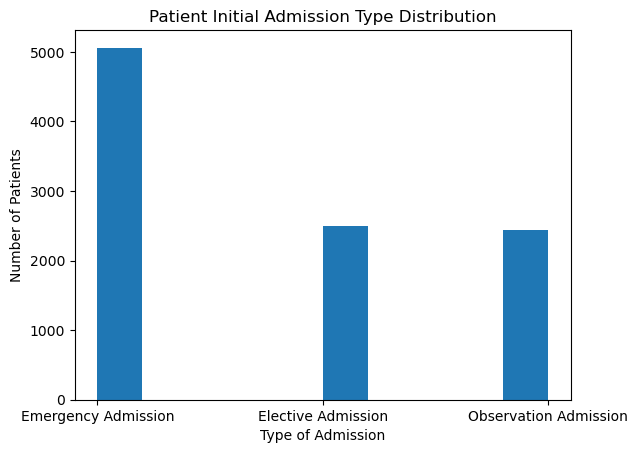

In [83]:
plt.hist(data=df, x="Initial_admin")
plt.title("Patient Initial Admission Type Distribution")
plt.xlabel("Type of Admission")
plt.ylabel("Number of Patients")
plt.show()

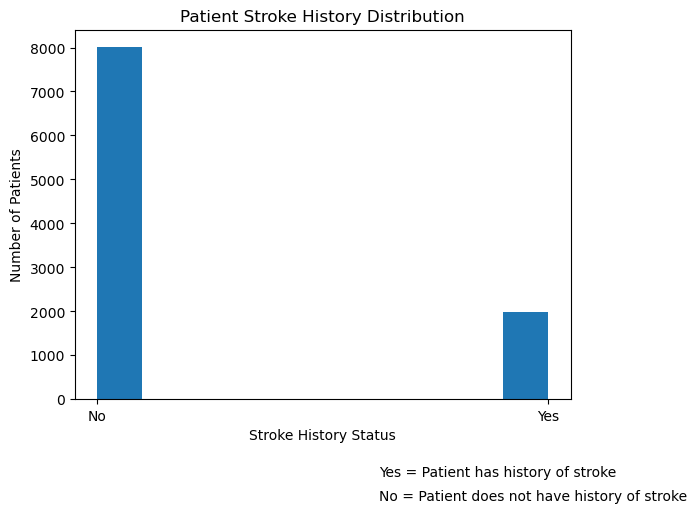

In [84]:
plt.hist(data=df, x="Stroke")
plt.title("Patient Stroke History Distribution")
plt.xlabel("Stroke History Status")
plt.ylabel("Number of Patients")
plt.figtext(0.6, -0.05, "Yes = Patient has history of stroke", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have history of stroke", ha="left")
plt.show()

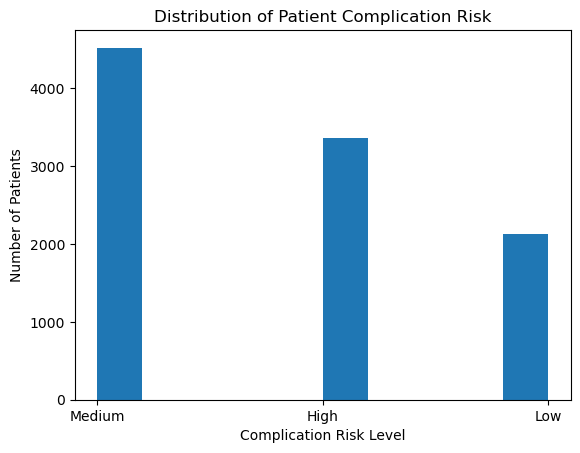

In [85]:
plt.hist(data=df, x="Complication_risk")
plt.title("Distribution of Patient Complication Risk")
plt.xlabel("Complication Risk Level")
plt.ylabel("Number of Patients")
plt.show()

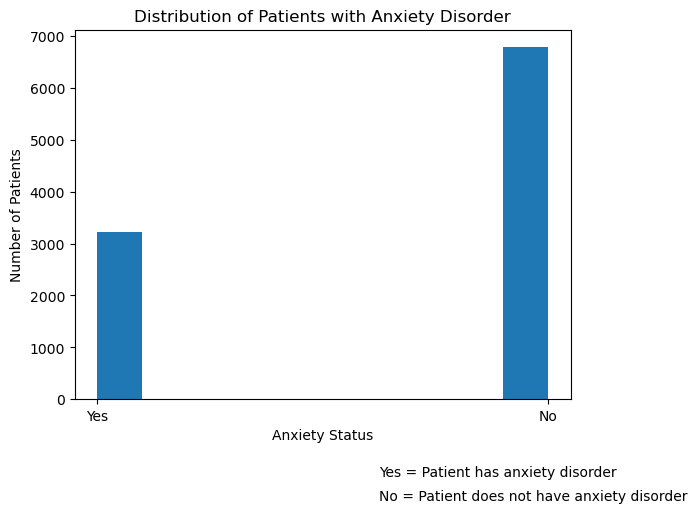

In [86]:
plt.hist(data=df, x="Anxiety")
plt.title("Distribution of Patients with Anxiety Disorder")
plt.xlabel("Anxiety Status")
plt.ylabel("Number of Patients")
plt.figtext(0.6, -0.05, "Yes = Patient has anxiety disorder", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have anxiety disorder", ha="left")
plt.show()

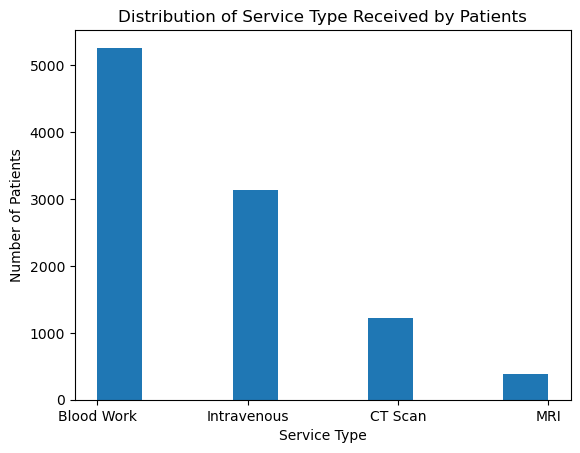

In [87]:
plt.hist(data=df, x="Services")
plt.title("Distribution of Service Type Received by Patients")
plt.xlabel("Service Type")
plt.ylabel("Number of Patients")
plt.show()

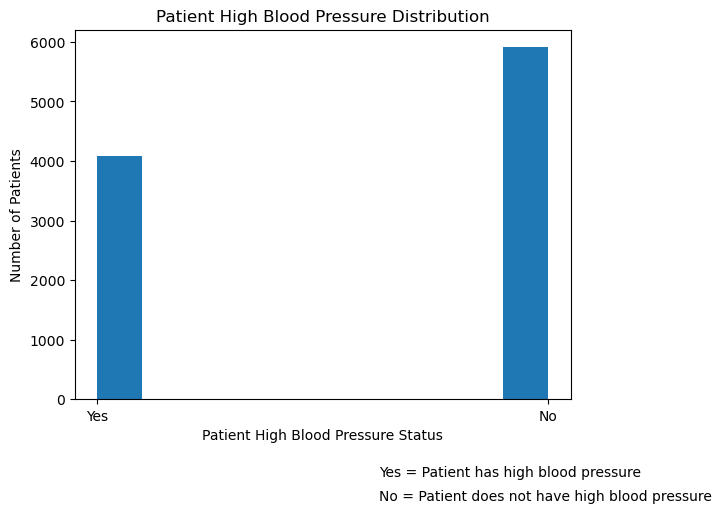

In [88]:
plt.hist(data=df, x="HighBlood")
plt.title("Patient High Blood Pressure Distribution")
plt.xlabel("Patient High Blood Pressure Status")
plt.ylabel("Number of Patients")
plt.figtext(0.6, -0.05, "Yes = Patient has high blood pressure", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have high blood pressure", ha="left")
plt.show()

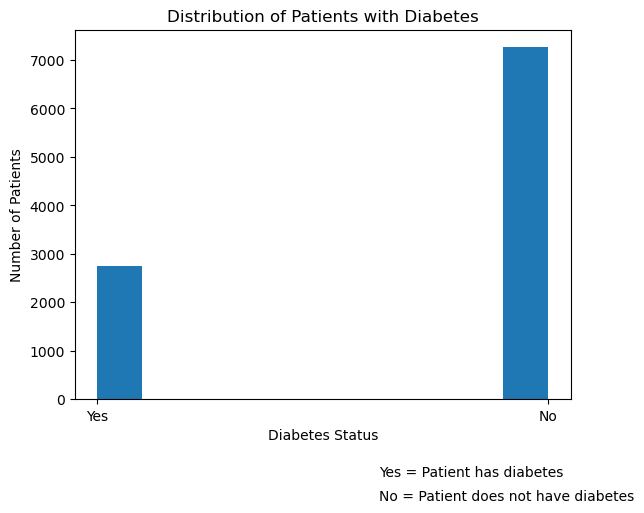

In [89]:
plt.hist(data=df, x="Diabetes")
plt.title("Distribution of Patients with Diabetes")
plt.xlabel("Diabetes Status")
plt.ylabel("Number of Patients")
plt.figtext(0.6, -0.05, "Yes = Patient has diabetes", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have diabetes", ha="left")
plt.show()

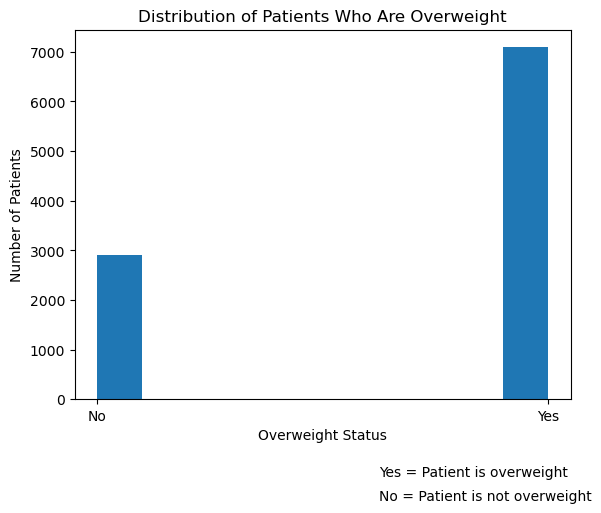

In [90]:
plt.hist(data=df, x="Overweight")
plt.title("Distribution of Patients Who Are Overweight")
plt.xlabel("Overweight Status")
plt.ylabel("Number of Patients")
plt.figtext(0.6, -0.05, "Yes = Patient is overweight", ha="left")
plt.figtext(0.6, -0.1, "No = Patient is not overweight", ha="left")
plt.show()

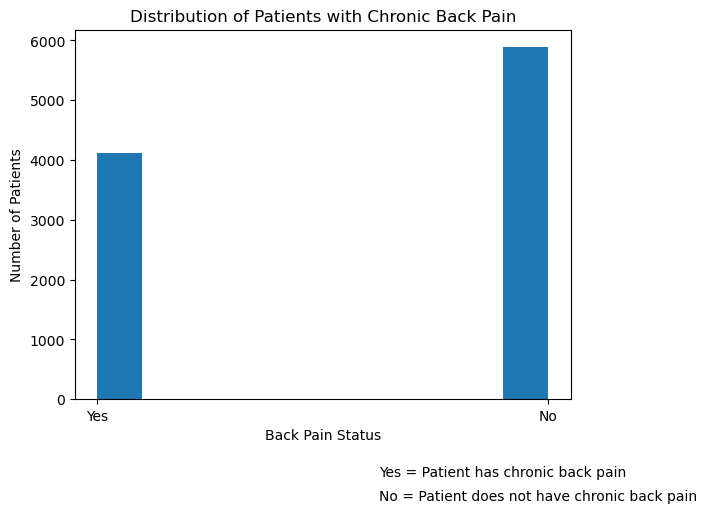

In [91]:
plt.hist(data=df, x="BackPain")
plt.title("Distribution of Patients with Chronic Back Pain")
plt.xlabel("Back Pain Status")
plt.ylabel("Number of Patients")
plt.figtext(0.6, -0.05, "Yes = Patient has chronic back pain", ha="left")
plt.figtext(0.6, -0.1, "No = Patient does not have chronic back pain", ha="left")
plt.show()

### Bivariate Visualizations

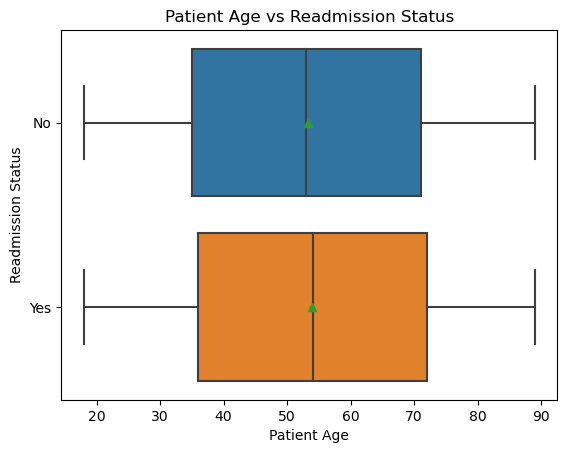

In [92]:
sns.boxplot(x='Age', y='ReAdmis', data=df,showmeans=True)
plt.title("Patient Age vs Readmission Status")
plt.xlabel("Patient Age")
plt.ylabel("Readmission Status")
plt.show()

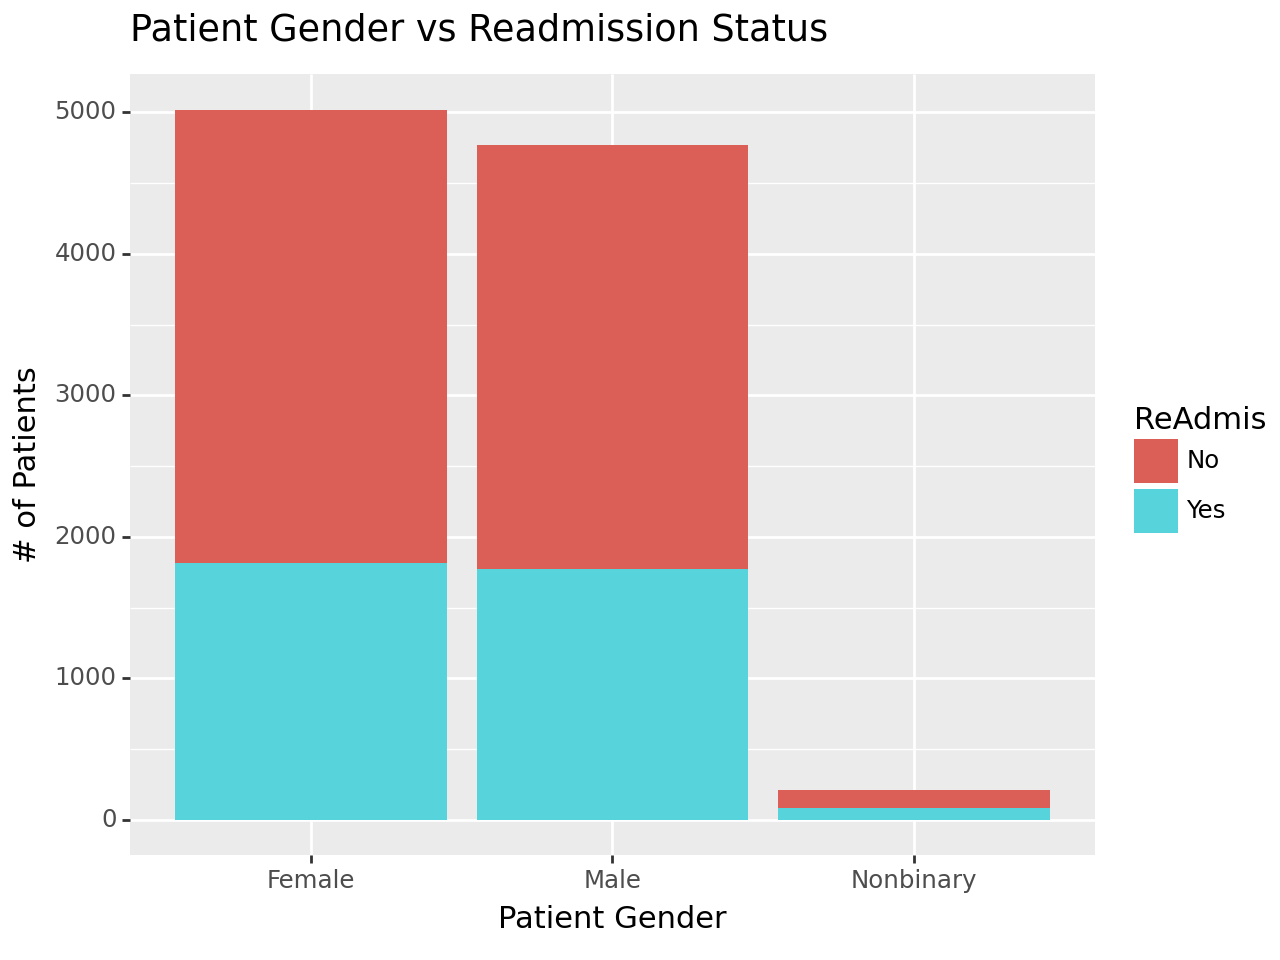

<Figure Size: (640 x 480)>

In [93]:
(p9.ggplot(df)+p9.aes('Gender', fill ='ReAdmis') + p9.geom_bar() + p9.ggtitle("Patient Gender vs Readmission Status") 
    + p9.xlab("Patient Gender")
    + p9.ylab("# of Patients"))

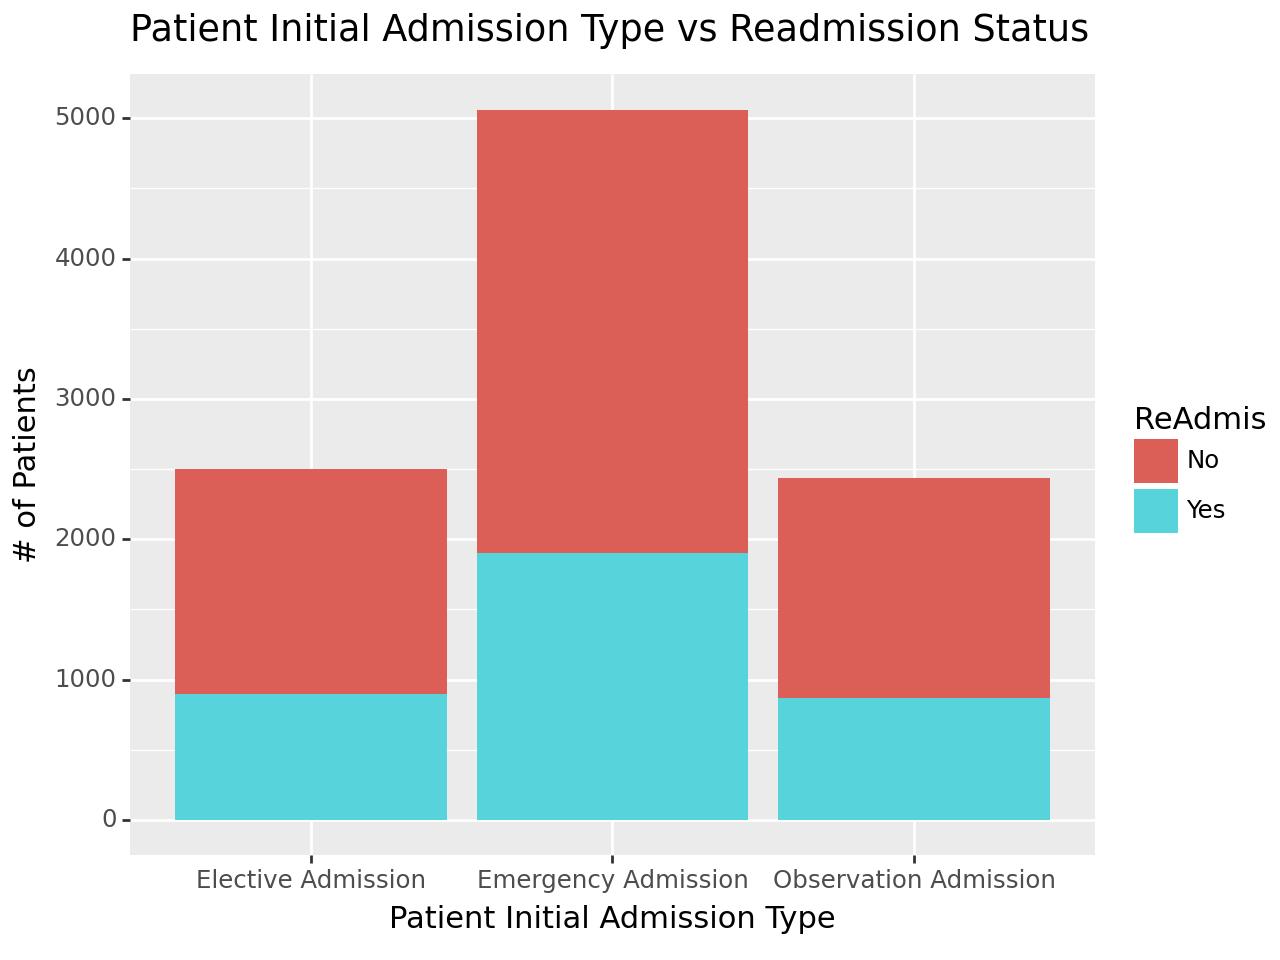

<Figure Size: (640 x 480)>

In [94]:
(p9.ggplot(df)+p9.aes('Initial_admin', fill ='ReAdmis') + p9.geom_bar() + p9.ggtitle("Patient Initial Admission Type vs Readmission Status") 
    + p9.xlab("Patient Initial Admission Type")
    + p9.ylab("# of Patients"))

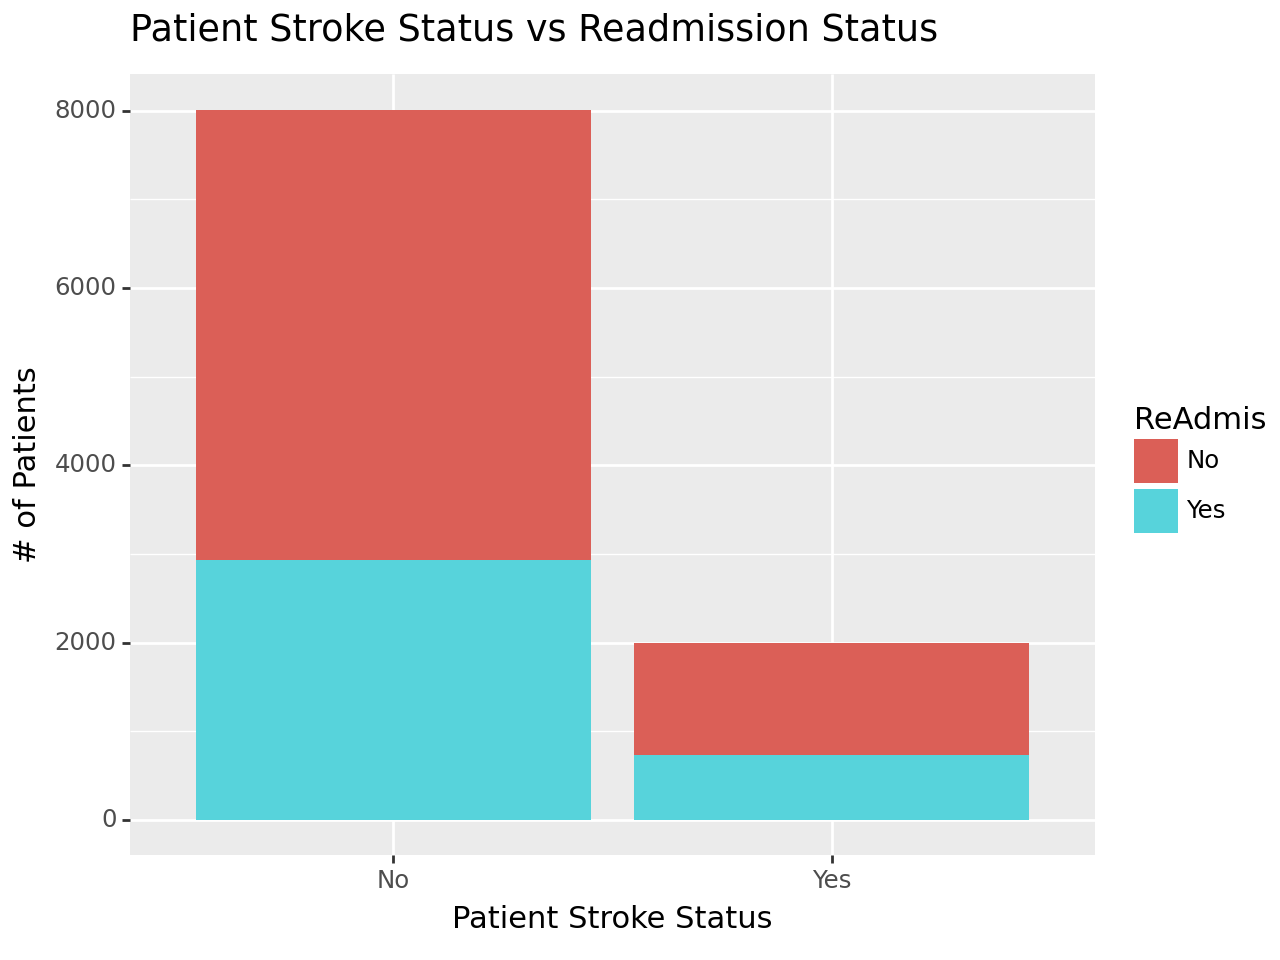

<Figure Size: (640 x 480)>

In [95]:
(p9.ggplot(df)+p9.aes('Stroke', fill ='ReAdmis') + p9.geom_bar() + p9.ggtitle("Patient Stroke Status vs Readmission Status") 
    + p9.xlab("Patient Stroke Status")
    + p9.ylab("# of Patients"))

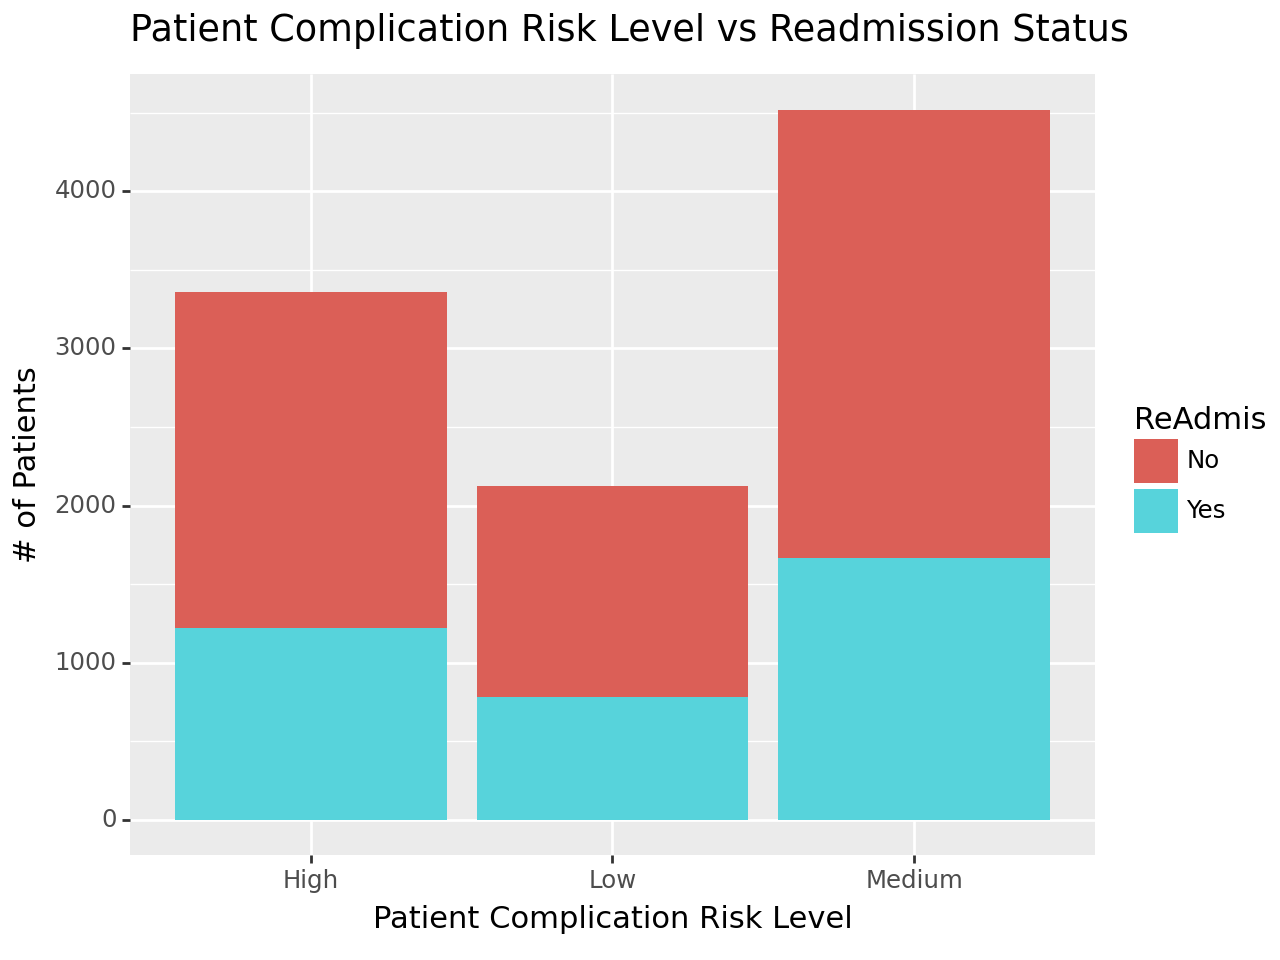

<Figure Size: (640 x 480)>

In [96]:
(p9.ggplot(df)+p9.aes('Complication_risk', fill ='ReAdmis') + p9.geom_bar() + p9.ggtitle("Patient Complication Risk Level vs Readmission Status") 
    + p9.xlab("Patient Complication Risk Level")
    + p9.ylab("# of Patients"))

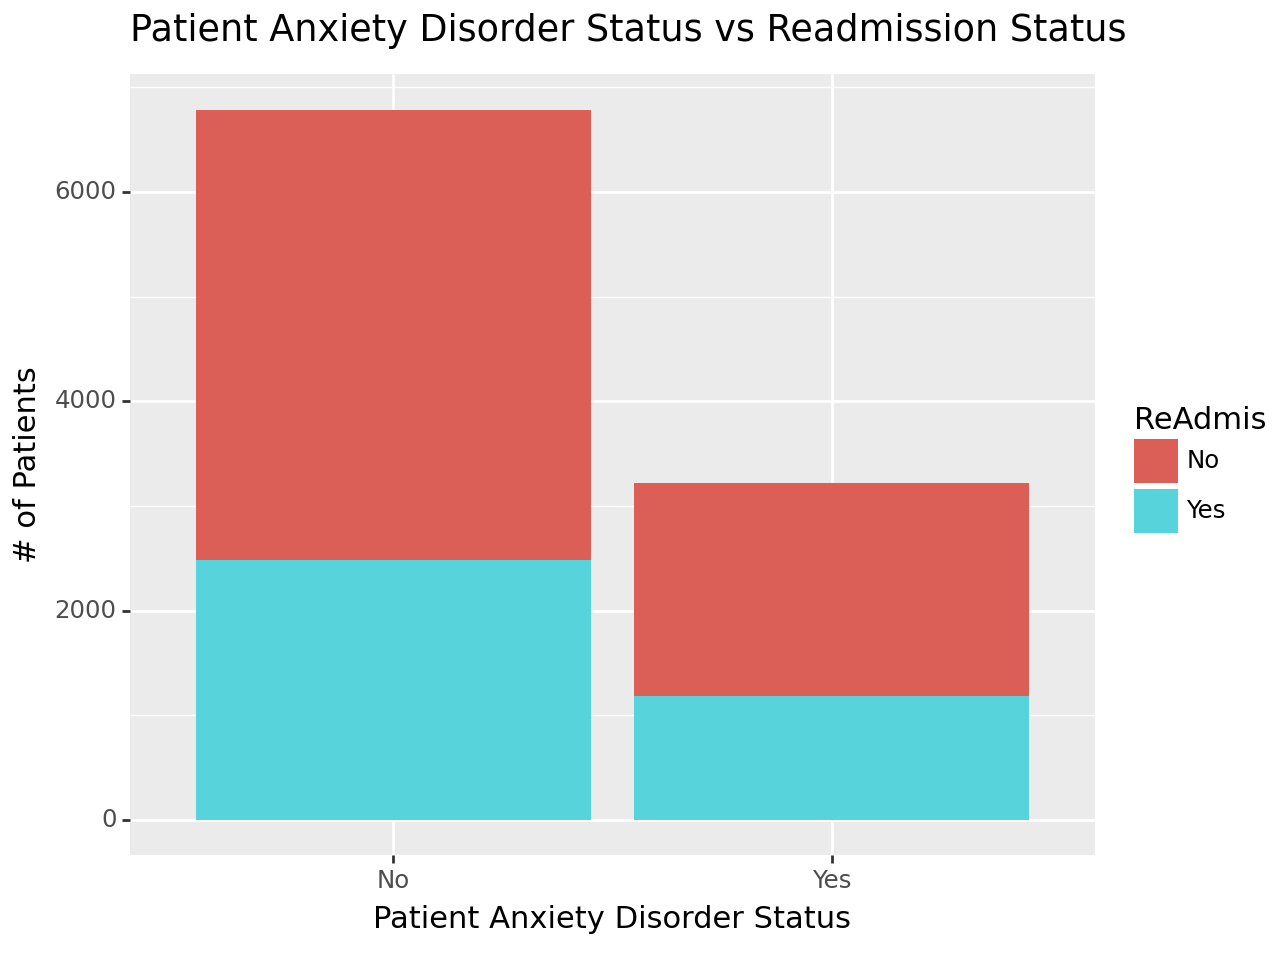

<Figure Size: (640 x 480)>

In [97]:
(p9.ggplot(df)+p9.aes('Anxiety', fill ='ReAdmis') + p9.geom_bar() + p9.ggtitle("Patient Anxiety Disorder Status vs Readmission Status") 
    + p9.xlab("Patient Anxiety Disorder Status")
    + p9.ylab("# of Patients"))

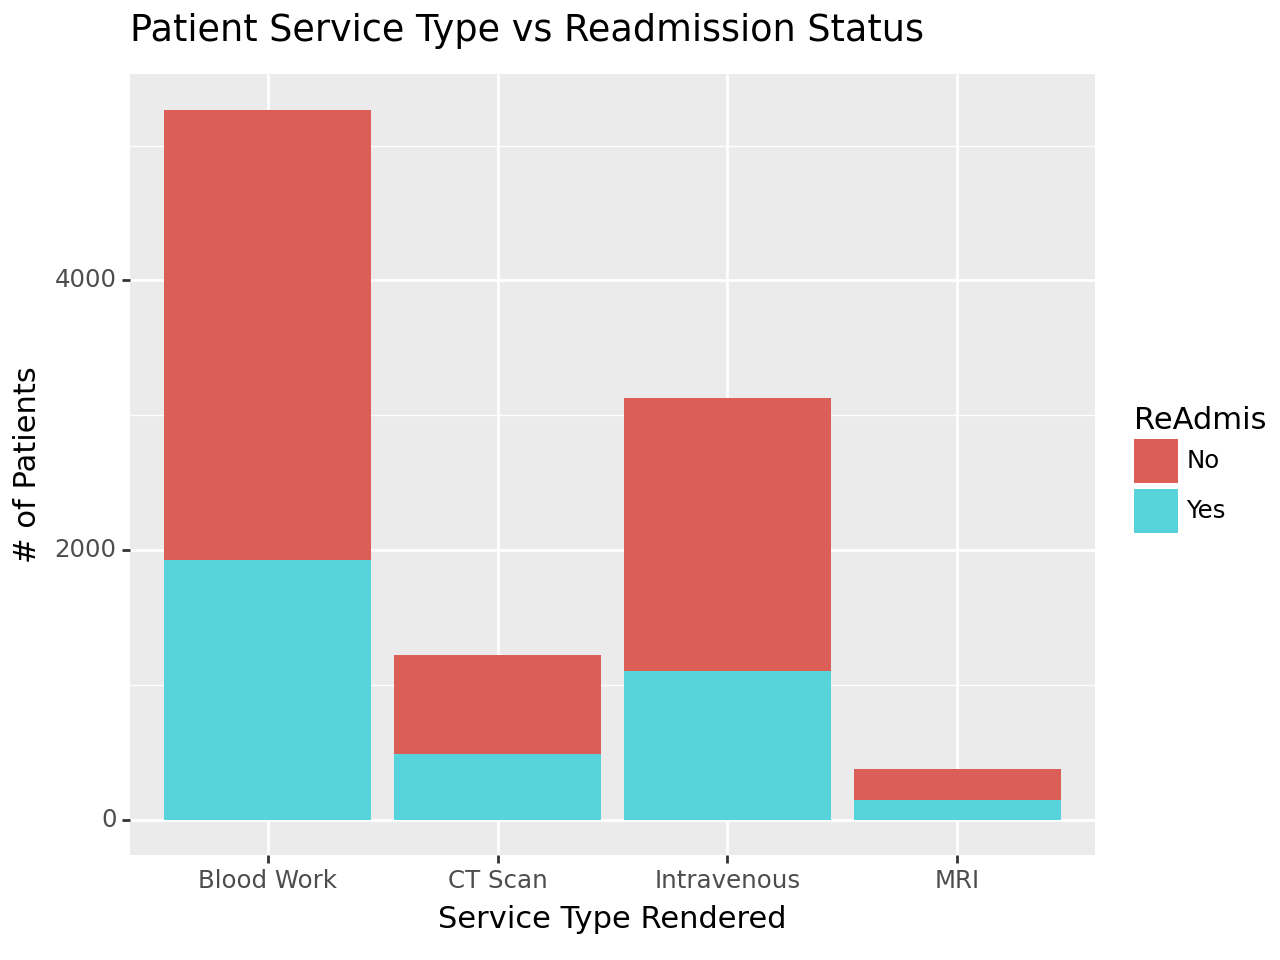

<Figure Size: (640 x 480)>

In [98]:
(p9.ggplot(df)+p9.aes('Services', fill ='ReAdmis') + p9.geom_bar() + p9.ggtitle("Patient Service Type vs Readmission Status") 
    + p9.xlab("Service Type Rendered")
    + p9.ylab("# of Patients"))

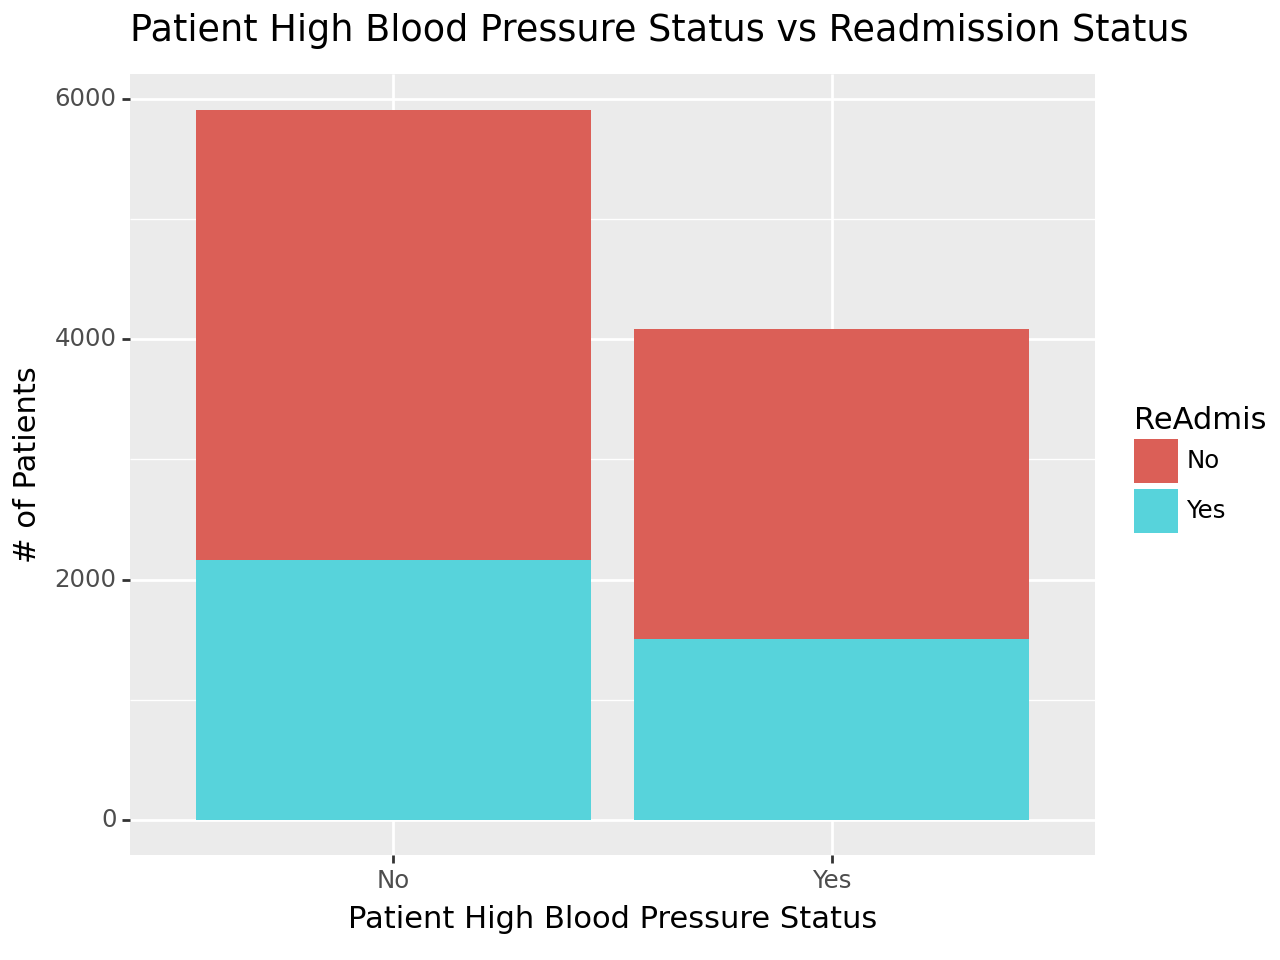

<Figure Size: (640 x 480)>

In [99]:
(p9.ggplot(df)+p9.aes('HighBlood', fill ='ReAdmis') + p9.geom_bar() + p9.ggtitle("Patient High Blood Pressure Status vs Readmission Status") 
    + p9.xlab("Patient High Blood Pressure Status")
    + p9.ylab("# of Patients"))

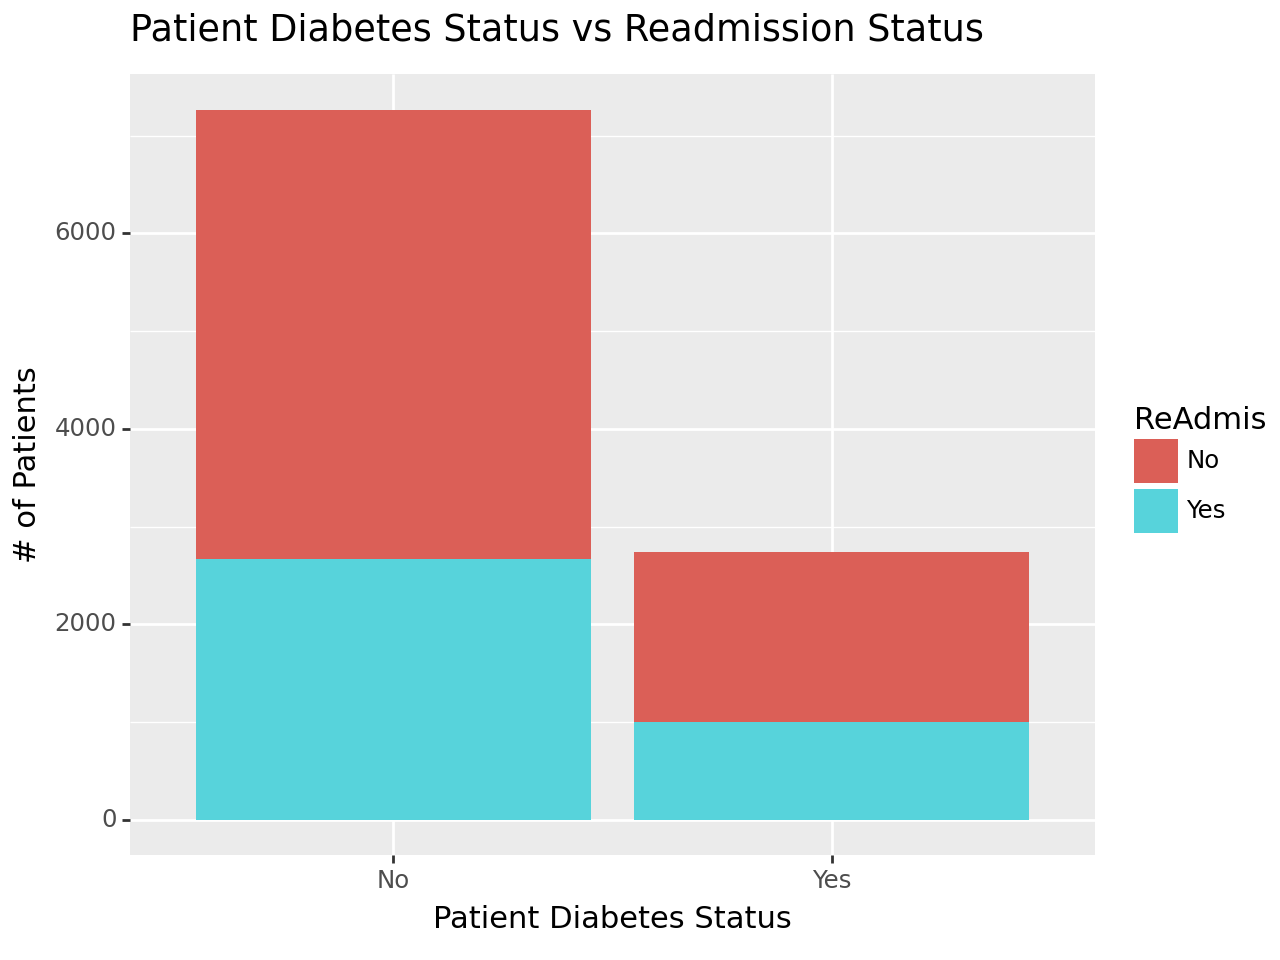

<Figure Size: (640 x 480)>

In [100]:
(p9.ggplot(df)+p9.aes('Diabetes', fill ='ReAdmis') + p9.geom_bar() + p9.ggtitle("Patient Diabetes Status vs Readmission Status") 
    + p9.xlab("Patient Diabetes Status")
    + p9.ylab("# of Patients"))

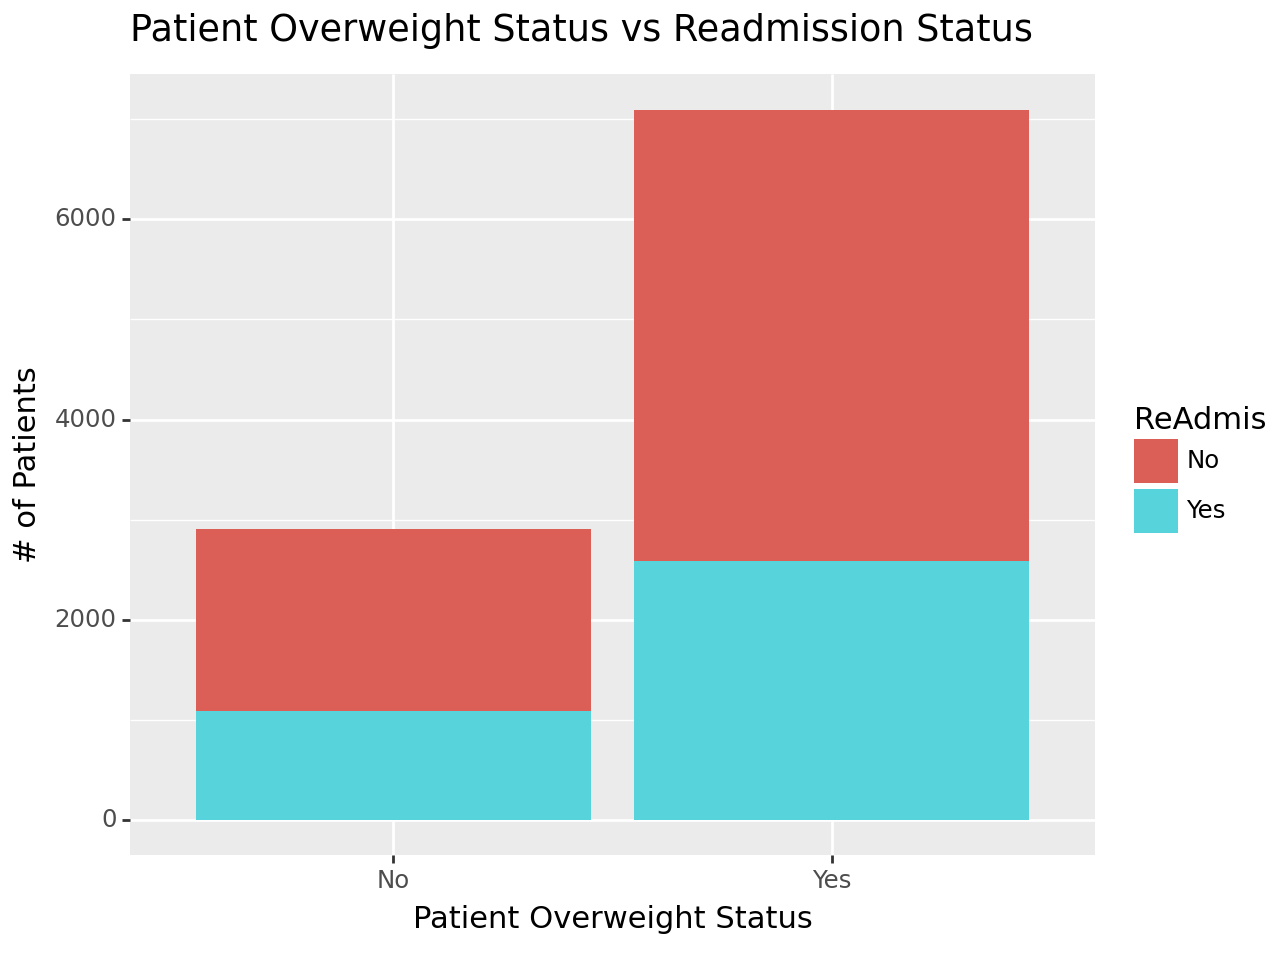

<Figure Size: (640 x 480)>

In [101]:
(p9.ggplot(df)+p9.aes('Overweight', fill ='ReAdmis') + p9.geom_bar() + p9.ggtitle("Patient Overweight Status vs Readmission Status") 
    + p9.xlab("Patient Overweight Status")
    + p9.ylab("# of Patients"))

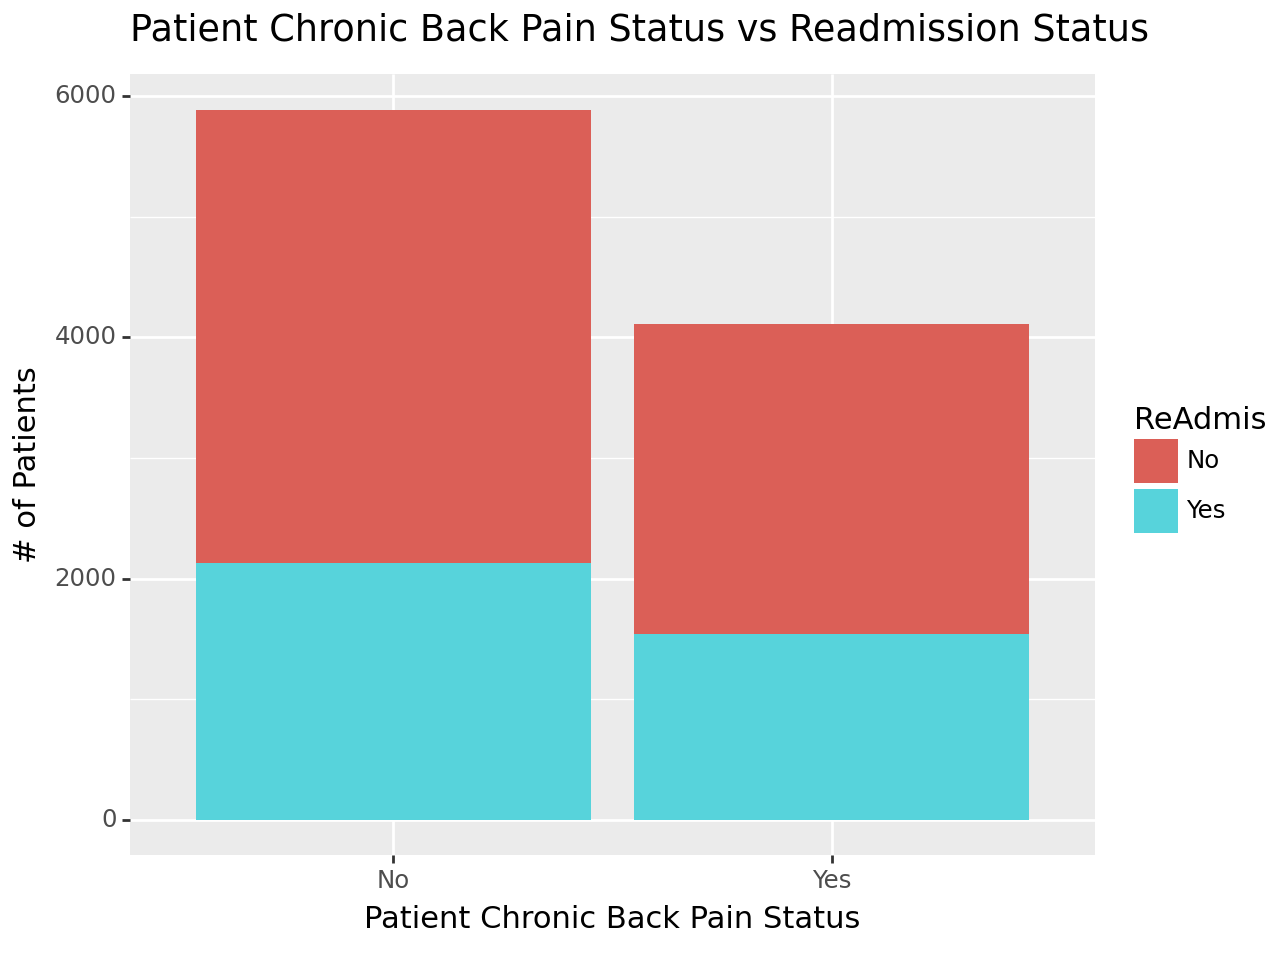

<Figure Size: (640 x 480)>

In [102]:
(p9.ggplot(df)+p9.aes('BackPain', fill ='ReAdmis') + p9.geom_bar() + p9.ggtitle("Patient Chronic Back Pain Status vs Readmission Status") 
    + p9.xlab("Patient Chronic Back Pain Status")
    + p9.ylab("# of Patients"))

## C4. Data Preparation
At a high level, my goals for data transformation/wrangling were to re-express the yes/no categorical variables as numbers, create dummy variables for nominal categorical variables, and create a new dataframe that holds only the variables of interest for multiple logistic regression. 

For multiple logistic regression, categorical variables of both ordinal and nominal type must be expressed numerically instead of using their label names or regression will not work. Thus, I converted the yes/no categorical variables to 1's for yeses and 0's for nos. Since there are not 3 or more nominal categories for these variables, there was no need to do one-hot encoding, as the resulting column from one-hot encoding would look the same as simply mapping using a dictionary, which is what I did below.

For variables that do have a higher cardinality of choices, however, I used one-hot encoding to create dummy variables, where we keep the "number of categories minus one" columns. For example, let's examine Gender. If a 1 appears in the dummy column for male, we know the patient was male. If a 1 appears in the dummy column for female, we know the patient was female. If 0 appears in both columns, we know the patient was non-binary and we can drop the non-binary dummy column. I created dummy variables only for the variables I chose to include in my regression analysis since doing this for all of them potentially expands the number of columns so much.

The final step I took was to create a dataframe containing only the variables of interest. Details on why I omitted some variables from the analysis and included others can be found below.

Certain variables were chosen over other variables for analysis because I intuitively believed they might be more valuable. With regard to age, I thought it might be common sense that since older people tend to have more serious issues, they might have a higher risk of readmission due to how complicated serious issues can be. Gender was included because while I see no intuitive reason gender would be related to readmission, including a demographic like this is common in studies. Variables relating to conditions, such as HighBlood, Stroke, Diabetes, BackPain, and Overweight seemed likely to contribute to readmission because they are either serious, complicated conditions or they complicate the care the patient would require, which might lead to complications that lead to readmission. Anxiety, in particular, was chosen because as someone with an anxiety disorder myself, I think anxiety can drive people to readmit themselves when it is not necessary. Complication_risk was chosen for  similar reasons to the condition variables-- if the risk of complications is higher, the care required for the patient is typically more complex and the treatment for the condition they were hospitalized with at higher risk of failure. Some variables were picked because of a logical relationship I intuitively believed could be present. Initial_admin was chosen because it seemed more likely that an emergency admission could lead readmission. Emergency rooms are rather busy and seem to focus efforts on the most emergent of situations, which might lead to the discharge of patients with what initially appear to be less serious issues. Finally, I picked Services because it makes sense that imaging procedures such as MRIs and CT scans are typically used for more complex procedures such as surgery. Blood work and intravenous injections, however, without imaging, would typically indicate that the issue was less serious. Serious issues, intuitively speaking, have more potential for complications that might cause a patient to be readmitted.

There are a number of reasons some variables were intentionally left out of regression analysis. City, State, County, Zip, Area, TimeZone, and Job had too high a cardinality of nominal categories for me to include. Their inclusion would require the creation of dummy variables, which would expand the dataset's dimensionality. Especially in regards to Job, these variables expanded the dataset's dimensionality too much. Many of the other variables not yet mentioned simply seemed to have little to no bearing on readmission or might skew the data, at least, according to my intuition. These variables included things like customer_id, interaction, UID, Lat, Lng, Population, Children, Income, Marital,  VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_Drink, Arthritis, Hyperlipidemia, Allergic_rhinitis, Reflux_esophagitis, Asthma, TotalCharge, Additional_charges, and the variables with the naming convention "Item#." Many of the variables in this list that indicate whether or not a patient has a certain condition were left out because these conditions are not serious conditions and are generally taken care of and managed easily by a primary care physician. Thus, I did not see them having much impact on readmission. Other variables, like Income, might skew the data. If a person makes less money, they are more likely to not seek hospital care in the first place, let alone readmission. This might make patients who make less money look as though they are not at risk for readmission, but in fact, they might still be.

Please use the attached ipynb file as the executable code required by this section.

In [103]:
# Create dictionary needed to re-map boolean columns.
boolean_map = {"No" : 0, "Yes" : 1}
# Map all boolean variables and convert to int
df["ReAdmis"] = df["ReAdmis"].map(boolean_map)
df["ReAdmis"] = df["ReAdmis"].astype("int64")
df["Soft_drink"] = df["Soft_drink"].map(boolean_map)
df["HighBlood"] = df["HighBlood"].map(boolean_map)
df["HighBlood"] = df["HighBlood"].astype('int64')
df["Stroke"] = df["Stroke"].map(boolean_map)
df["Stroke"] = df["Stroke"].astype('int64')
df["Overweight"] = df["Overweight"].map(boolean_map)
df["Overweight"] = df["Overweight"].astype('int64')
df["Arthritis"] = df["Arthritis"].map(boolean_map)
df["Diabetes"] = df["Diabetes"].map(boolean_map)
df["Diabetes"] = df["Diabetes"].astype('int64')
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(boolean_map)
df["BackPain"] = df["BackPain"].map(boolean_map)
df["BackPain"] = df["BackPain"].astype('int64')
df["Anxiety"] = df["Anxiety"].map(boolean_map)
df["Anxiety"] = df["Anxiety"].astype('int64')
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(boolean_map)
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(boolean_map)
df["Asthma"] = df["Asthma"].map(boolean_map)

# Check that these took.
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,Central,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10,3726.70,17939.40,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,Central,Community development worker,3,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15,4193.19,17613.00,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,Central,Chief Executive Officer,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4,2434.23,17505.19,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,Central,Early years teacher,0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1,2127.83,12993.44,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,Eastern,Health promotion specialist,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1,2113.07,3716.53,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,Central,Corporate treasurer,3,76,81999.88,Never Married,Male,0,19.612646,6,0,0,0,Observation Admission,0,0,Medium,1,1,1,0,1,0,1,0,0,Blood Work,5,2636.69,12742.59,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,Eastern,Hydrologist,0,50,10456.05,Never Married,Male,0,14.751687,6,0,0,0,Emergency Admission,1,0,Low,1,1,1,1,1,1,0,1,0,Intravenous,9,3694.63,16815.51,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,Eastern,Psychiatric nurse,7,40,38319.29,Divorced,Female,0,19.688673,7,2,0,0,Observation Admission,0,0,Medium,1,0,0,0,0,0,0,0,0,Intravenous,14,3021.50,6930.57,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,Central,Computer games developer,0,48,55586.48,Widowed,Male,0,19.653320,6,3,0,0,Emergency Admission,0,0,Low,1,0,0,1,0,0,0,0,0,Intravenous,6,2968.40,8363.19,3,3,2,3,3,3,4,2


In [104]:
# Create dummy variables, keeping k-1 category columns.
Gender_dum = pd.get_dummies(data=df['Gender'], drop_first=True)
Initial_admin_dum = pd.get_dummies(data=df['Initial_admin'], drop_first=True)
Comp_risk_dum = pd.get_dummies(data=df['Complication_risk'], drop_first=True)
Services_dum = pd.get_dummies(data=df['Services'], drop_first=True)

# Create regression variable only dataframe and insert dummy columns into it.
# [In-Text Citation: (GeeksforGeeks, 2023).]
MLR_df = df[['Age', 'ReAdmis', 'HighBlood', 'Stroke', 'Diabetes',
            'BackPain', 'Anxiety', 'Overweight']]
MLR_df.insert(1,"dummy_male", Gender_dum.Male)
MLR_df.insert(1,"dummy_nonbinary", Gender_dum.Nonbinary)
MLR_df.insert(5,"dummy_emergency", Initial_admin_dum["Emergency Admission"])
MLR_df.insert(5,"dummy_observation", Initial_admin_dum["Observation Admission"])
MLR_df.insert(9,"dummy_comp_risk_low", Comp_risk_dum.Low)
MLR_df.insert(9,"dummy_comp_risk_medium", Comp_risk_dum.Medium)
MLR_df.insert(14,"dummy_CT_scan", Services_dum["CT Scan"])
MLR_df.insert(14,"dummy_intravenous", Services_dum.Intravenous)
MLR_df.insert(14,"dummy_MRI", Services_dum.MRI)

In [105]:
# Check new dataframe to see if insertions took.
# Compare to original dataframe to ensure order was kept in dummies.
MLR_df.head(20)

,Age,dummy_nonbinary,dummy_male,ReAdmis,HighBlood,dummy_observation,dummy_emergency,Stroke,Diabetes,dummy_comp_risk_medium,dummy_comp_risk_low,BackPain,Anxiety,Overweight,dummy_MRI,dummy_intravenous,dummy_CT_scan
CaseOrder,,,,,,,,,,,,,,,,,
1,53,0,1,0,1,0,1,0,1,1,0,1,1,0,0,0,0
2,51,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
3,53,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0
4,78,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
5,22,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6,76,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0
7,50,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,0
8,40,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
9,48,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0


In [106]:
# Check that datatypes are numeric
MLR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     10000 non-null  int64
 1   dummy_nonbinary         10000 non-null  uint8
 2   dummy_male              10000 non-null  uint8
 3   ReAdmis                 10000 non-null  int64
 4   HighBlood               10000 non-null  int64
 5   dummy_observation       10000 non-null  uint8
 6   dummy_emergency         10000 non-null  uint8
 7   Stroke                  10000 non-null  int64
 8   Diabetes                10000 non-null  int64
 9   dummy_comp_risk_medium  10000 non-null  uint8
 10  dummy_comp_risk_low     10000 non-null  uint8
 11  BackPain                10000 non-null  int64
 12  Anxiety                 10000 non-null  int64
 13  Overweight              10000 non-null  int64
 14  dummy_MRI               10000 non-null  uint8
 15  dummy_intravenous  

## C5. Prepared Dataset

A copy of the post-cleaning and transformation dataframe limited to the variables I have picked for regression. In my Task 1 paper, I was informed by the evaluator that read my paper that only this dataset is needed and to not include a dataset that is post-cleaning but pre-transformation.

The cleaned *and* transformed dataframe is titled "MLR_cleaned_AND_transformed_Task2.csv".

In [107]:
MLR_df.to_csv('MLR_clean_AND_transformed_Task2.csv', index=False)

## D1. Initial Multiple Logistic Regression Model
Below you will find my initial multiple logistic regression model which includes all of the explanatory variables from section C3 and my response variable, ReAdmis. Please note I have not yet checked for multicollinearity and intend to do so immediately before model reduction. Variables that are multicollinear violate a key assumption of multiple logistic regression given in B1 and could make the model unreliable if retained. The model summary can be found below.

In [108]:
init_model = logit('ReAdmis ~ Age + dummy_nonbinary + dummy_male + HighBlood + dummy_observation + dummy_emergency + Stroke + Diabetes + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + Overweight + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(init_model.summary())

Optimization terminated successfully.
         Current function value: 0.656313
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001479
Time:                        21:23:46   Log-Likelihood:                -6563.1
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.2467
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7074      0.092     -7.690      0.000      -0.888      

## D2. Model Reduction Method
Before choosing a method to reduce the model, I will check for multicollinearity. As previously stated, retaining variables that are multicollinear violates an assumption of multiple logistic regression, leading to a model that could be unreliable. Below, I will use the variance inflation factor (VIF) to check for multicollinearity between the initial model's variables. Explanatory variables with VIF > 10 will be investigated and omitted one at a time before true model reduction. When all explanatory variables have a VIF < 10, I can proceed to model reduction as this indicates multicollinearity that is too high to be acceptable has been eliminated.

In [109]:
# Check VIF and remove variable with highest value VIF until all variables have VIF under 10.
# First, isolate explanatory variables.
X = MLR_df[['Age', 'dummy_nonbinary', 'dummy_male', 'HighBlood', 'dummy_observation', 'dummy_emergency', 'Stroke', 'Diabetes', 'dummy_comp_risk_medium', 'dummy_comp_risk_low', 'BackPain', 'Anxiety', 'Overweight', 'dummy_MRI', 'dummy_intravenous', 'dummy_CT_scan']]
VIF_df = pd.DataFrame()
VIF_df['feature'] = X.columns
VIF_df['VIF'] = [variance_inflation_factor(X.values,i)
for i in range(len(X.columns))]
print(VIF_df.sort_values('VIF', ascending=False))

                   feature       VIF
0                      Age  5.042109
12              Overweight  3.019579
5          dummy_emergency  2.588919
8   dummy_comp_risk_medium  2.158076
2               dummy_male  1.832338
4        dummy_observation  1.774734
10                BackPain  1.654013
3                HighBlood  1.645512
9      dummy_comp_risk_low  1.540775
14       dummy_intravenous  1.538786
11                 Anxiety  1.440427
7                 Diabetes  1.351012
6                   Stroke  1.234758
15           dummy_CT_scan  1.213623
13               dummy_MRI  1.068263
1          dummy_nonbinary  1.039785


The above VIF check shows no concerning explanatory variables, since all VIFs are under 10. To reduce my model, I will use backwards stepwise elimination. This process will remove explanatory variables that do not provide value to the model because they are not statistically significant and hence do not inform the answer to the research question. In layman's terms, the variables I am about to remove using the method below have little to no relationship with the response variable, readmission, and are virtually useless. Thus, we will want to remove these "garbage" explanatory variables.

Backwards stepwise elimination is an iterative process where we remove the least statistically significant explanatory variable based on p-value until all explanatory variables are statistically significant. I will set the p-value threshold to 0.06. Anything below this threshold will be considered statistically significant, while anything above will not. In backwards stepwise elimination I will remove the explanatory variable with the highest p-value until all p-values are under the threshold of 0.06. Please note that I was originally going to use the commonly-used threshold of 0.05, but doing so would leave me with just one explanatory variable, meaning the reduced model would no longer be a *multiple* logistic regression model. The variable in question, dummy_emergency, was only slightly higher than the original 0.05 threshold I had intended to use. This will impact the limitations of the model, which I will discuss in section F1.

To do this, I will run the multiple logistic regression model in the same way I ran it for my initial model. I will use the .summary() to pick out the explanatory variable with the highest p-value, eliminate it, and run the model again without it until the process is complete, as detailed above.

In [110]:
# Rerun model in the same way as initial model.
# Then check summary and remove highest p-value variable.
BSE1_model = logit('ReAdmis ~ Age + dummy_nonbinary + dummy_male + HighBlood + dummy_observation + dummy_emergency + Stroke + Diabetes + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + Overweight + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE1_model.summary())

Optimization terminated successfully.
         Current function value: 0.656313
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001479
Time:                        21:24:18   Log-Likelihood:                -6563.1
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.2467
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7074      0.092     -7.690      0.000      -0.888      

In [111]:
# Removed dummy_observation
BSE2_model = logit('ReAdmis ~ Age + dummy_nonbinary + dummy_male + HighBlood + dummy_emergency + Stroke + Diabetes + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + Overweight + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE2_model.summary())

Optimization terminated successfully.
         Current function value: 0.656313
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001479
Time:                        21:24:26   Log-Likelihood:                -6563.1
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.1947
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7072      0.087     -8.118      0.000      -0.878      

In [112]:
# Removed Stroke
BSE3_model = logit('ReAdmis ~ Age + dummy_nonbinary + dummy_male + HighBlood + dummy_emergency + Diabetes + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + Overweight + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE3_model.summary())

Optimization terminated successfully.
         Current function value: 0.656313
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001478
Time:                        21:24:29   Log-Likelihood:                -6563.1
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.1490
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7068      0.087     -8.169      0.000      -0.876      

In [113]:
# Removed HighBlood
BSE4_model = logit('ReAdmis ~ Age + dummy_nonbinary + dummy_male + dummy_emergency + Diabetes + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Anxiety + Overweight + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE4_model.summary())

Optimization terminated successfully.
         Current function value: 0.656315
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001476
Time:                        21:24:30   Log-Likelihood:                -6563.2
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.1112
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7039      0.085     -8.280      0.000      -0.871      

In [114]:
# Removed Anxiety
BSE5_model = logit('ReAdmis ~ Age + dummy_nonbinary + dummy_male + dummy_emergency + Diabetes + dummy_comp_risk_medium + dummy_comp_risk_low + BackPain + Overweight + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE5_model.summary())

Optimization terminated successfully.
         Current function value: 0.656318
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001472
Time:                        21:24:32   Log-Likelihood:                -6563.2
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.08041
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7007      0.084     -8.358      0.000      -0.865      

In [115]:
# Removed dummy_comp_risk_low
BSE6_model = logit('ReAdmis ~ Age + dummy_nonbinary + dummy_male + dummy_emergency + Diabetes + dummy_comp_risk_medium + BackPain + Overweight + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE6_model.summary())

Optimization terminated successfully.
         Current function value: 0.656322
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001466
Time:                        21:24:33   Log-Likelihood:                -6563.2
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.05648
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.6943      0.081     -8.588      0.000      -0.853      

In [116]:
# Removed dummy_comp_risk_medium
BSE7_model = logit('ReAdmis ~ Age + dummy_nonbinary + dummy_male + dummy_emergency + Diabetes + BackPain + Overweight + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE7_model.summary())

Optimization terminated successfully.
         Current function value: 0.656327
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001458
Time:                        21:24:35   Log-Likelihood:                -6563.3
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.03813
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.6885      0.079     -8.757      0.000      -0.843      -0.534
Age     

In [117]:
# Removed Diabetes
BSE8_model = logit('ReAdmis ~ Age + dummy_nonbinary + dummy_male + dummy_emergency + BackPain + Overweight + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE8_model.summary())

Optimization terminated successfully.
         Current function value: 0.656332
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001450
Time:                        21:24:37   Log-Likelihood:                -6563.3
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.02464
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.6927      0.078     -8.931      0.000      -0.845      -0.541
Age     

In [118]:
# Removed dummy_nonbinary
BSE9_model = logit('ReAdmis ~ Age + dummy_male + dummy_emergency + BackPain + Overweight + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE9_model.summary())

Optimization terminated successfully.
         Current function value: 0.656363
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001404
Time:                        21:24:38   Log-Likelihood:                -6563.6
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.01808
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.6881      0.077     -8.899      0.000      -0.840      -0.537
Age     

In [119]:
# Removed Overweight
BSE10_model = logit('ReAdmis ~ Age + dummy_male + dummy_emergency + BackPain + dummy_MRI + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE10_model.summary())

Optimization terminated successfully.
         Current function value: 0.656397
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001351
Time:                        21:24:40   Log-Likelihood:                -6564.0
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.01310
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7154      0.070    -10.213      0.000      -0.853      -0.578
Age     

In [120]:
# Removed dummy_MRI
BSE11_model = logit('ReAdmis ~ Age + dummy_male + dummy_emergency + BackPain + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE11_model.summary())

Optimization terminated successfully.
         Current function value: 0.656435
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001294
Time:                        21:24:41   Log-Likelihood:                -6564.3
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.009264
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7094      0.070    -10.178      0.000      -0.846      -0.573
Age     

In [121]:
# Removed dummy_male
BSE12_model = logit('ReAdmis ~ Age + dummy_emergency + BackPain + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE12_model.summary())

Optimization terminated successfully.
         Current function value: 0.656491
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001209
Time:                        21:24:43   Log-Likelihood:                -6564.9
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.007159
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.6868      0.066    -10.359      0.000      -0.817      -0.557
Age     

In [122]:
# Removed BackPain
BSE13_model = logit('ReAdmis ~ Age + dummy_emergency + dummy_intravenous + dummy_CT_scan', data=MLR_df).fit()
print(BSE13_model.summary())

Optimization terminated successfully.
         Current function value: 0.656568
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                0.001091
Time:                        21:24:45   Log-Likelihood:                -6565.7
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.006267
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.6665      0.064    -10.377      0.000      -0.792      -0.541
Age     

In [123]:
# Removed dummy_intravenous
BSE14_model = logit('ReAdmis ~ Age + dummy_emergency + dummy_CT_scan', data=MLR_df).fit()
print(BSE14_model.summary())

Optimization terminated successfully.
         Current function value: 0.656677
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:               0.0009257
Time:                        21:24:46   Log-Likelihood:                -6566.8
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.006825
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6903      0.062    -11.100      0.000      -0.812      -0.568
Age           

In [124]:
# Removed Age
BSE15_model = logit('ReAdmis ~ dummy_emergency + dummy_CT_scan', data=MLR_df).fit()
print(BSE15_model.summary())

Optimization terminated successfully.
         Current function value: 0.656800
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:               0.0007386
Time:                        21:24:48   Log-Likelihood:                -6568.0
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.007790
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6057      0.031    -19.731      0.000      -0.666      -0.545
dummy_emergenc

The last model, shown above, is my reduced model and my final model. Every variable has a p-value, indicated in the 5th column of the table, that is below 0.06. Thus, all of the remaining explanatory variables in the model are statistically significant according to the threshold I chose. I will reiterate this below.

## D3. Reduced Multiple Logistic Regression Model
For clarity, below you will again find my final reduced model.

Variables eliminated in multicollinearity check:
None

Variables eliminated in backwards stepwise elimination:
1. dummy_observation
2. Stroke
3. HighBlood
4. Anxiety
5. dummy_comp_risk_low
6. dummy_comp_risk_medium
7. Diabetes
8. dummy_nonbinary
9. Overweight
10. dummy_MRI
11. dummy_male
12. BackPain
13. dummy_intravenous
14. Age

In [125]:
# Removed Age
BSE15_model = logit('ReAdmis ~ dummy_emergency + dummy_CT_scan', data=MLR_df).fit()
print(BSE15_model.summary())

Optimization terminated successfully.
         Current function value: 0.656800
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:               0.0007386
Time:                        21:25:20   Log-Likelihood:                -6568.0
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                  0.007790
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6057      0.031    -19.731      0.000      -0.666      -0.545
dummy_emergenc

## E1. Comparison of Initial Model vs. Reduced Model
To quantitatively compare the performance of my initial model and my reduced model, I will be using the LLR p-value as my model evaluation metric. This metric attempts to determine if the model in question is better at predicting the response variable than a model with no predictor variables. LLR p-value, also known as p-value of a likelihood ratio test, allows us to discern if a model is "useful" or not. Generally speaking, any model that has an LLR p-value under 0.05 is considered statistically significant and therefore "useful." However, the lower the LLR p-value-- as with p-values used in other contexts-- the less likely it is that the result obtained is based on random chance rather than a true relationship. When comparing two models, the better model will have a lower LLR p-value and thus predict the response variable effectively. 

Since the LLR p-value for the initial model was 0.2467, we can conclude that the initial model does *not* predict the response variable better than a model with no explanatory variables because this LLR p-value exceeds the threshold of 0.05. The reduced model, however, had an LLR p-value of 0.00779, which is far lower than the threshold. Thus, we can conclude the reduced model *is* better at predicting the response variable than a model with no explanatory variables. These results also mean that the reduced model is "useful" while the initial model is not.

It would be remiss of me not to mention the less technical differences between the two models. The initial model used 16 explanatory variables (where each dummy variable is counted as its own variable) to attempt to make predictions about the response variable, readmission. The reduced model, however, used only two, as most were eliminated during backwards stepwise elimination due to the lack of statistical significance.

## E2. Analysis Outputs
Below you will find the confusion matrix for the reduced model and also a calculation for accuracy.

In [126]:
# Confusion matrix, but make it readable for a layperson.
conf_matrix = BSE15_model.pred_table()
title_list = ["Actual False", "Actual True"]
conf_matrix_df = pd.DataFrame(conf_matrix, columns = ["Model Predicted False", "Model Predicted True"])
conf_matrix_df.insert(0," ", title_list)
conf_matrix_df["Model Predicted False"] = conf_matrix_df["Model Predicted False"].astype("int64")
conf_matrix_df["Model Predicted True"] = conf_matrix_df["Model Predicted True"].astype("int64")
print(conf_matrix_df)

                 Model Predicted False  Model Predicted True
0  Actual False                   6331                     0
1   Actual True                   3669                     0


The confusion matrix above, stored as a dataframe for your convenience, shows that the reduced model correctly predicted the response variable 6,331 times, which is the sum of true negatives (in the column "Model Predicted False" and row "Actual False") and true positives (in the column "Model Predicted True" and row "Actual True.") Of these correct predictions, 6,331 of them were true negatives and zero of them were true positives. The model made incorrect predictions 3,669 times, which is the sum of false negatives (in the column "Model Predicted False" and the row "Actual True") and false positives (in the column "Model Predicted True" and the row "Actual False.") Of these, 3,669 of the predictions were false negatives and zero were false positives. 

The plot of the confusion matrix below can be tricky to read. The width of the columns indicates what fraction of the observations had the actual response variable value of "false" for the red column and "true" for the green column. Since there were no false positives or true positives, the bars in the plot below are not split. The red bar indicates that all observations whose readmission status was "false" were correctly predicted by the model to be false. The green bar indicates that all observations whose readmission status was "true" were incorrectly predicted by the model to be false.

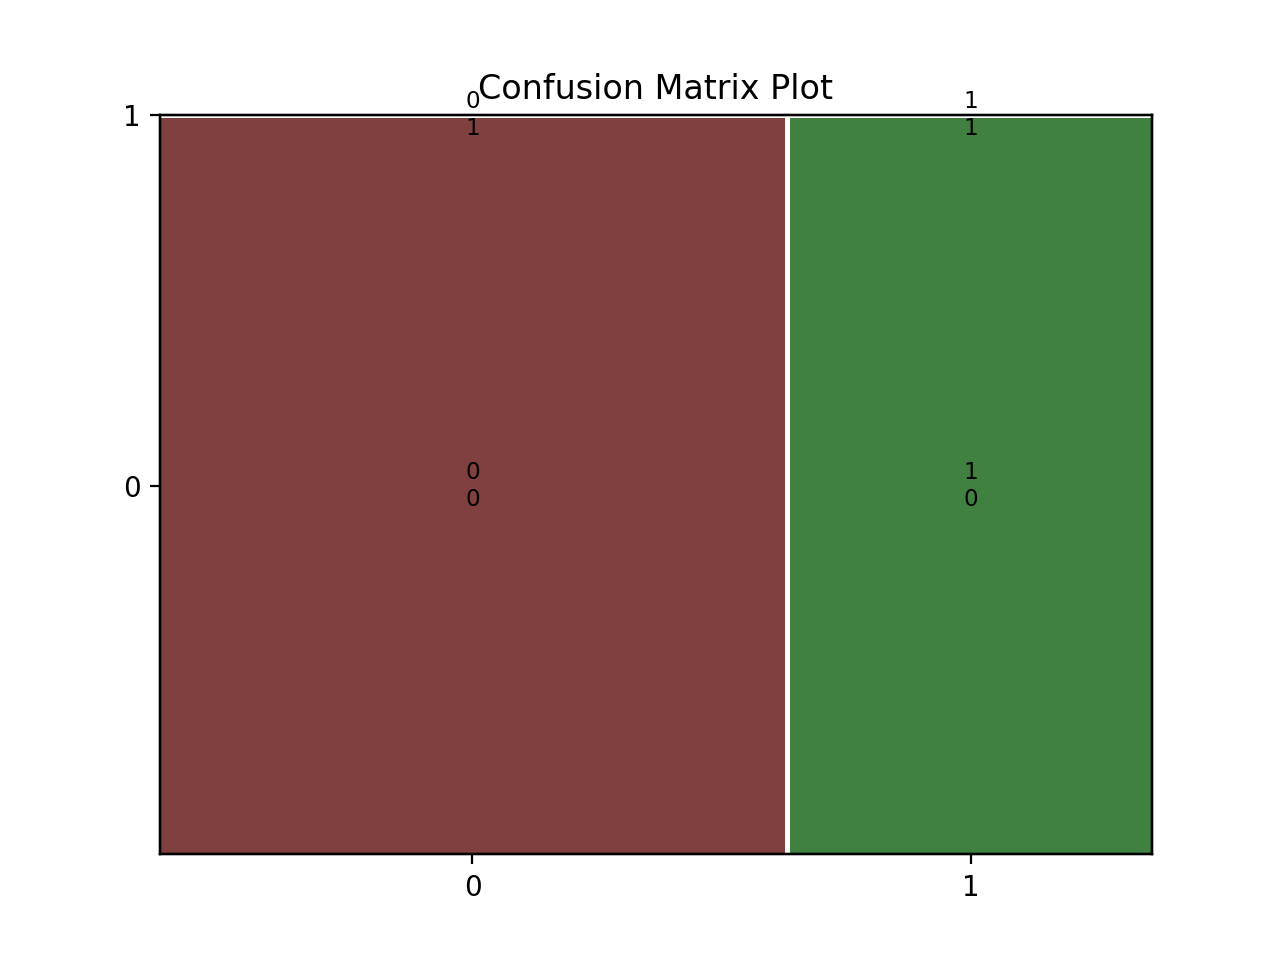

In [127]:
# Confusion matrix visual, because it's helpful
mosaic(conf_matrix, title="Confusion Matrix Plot")
plt.show()

In [128]:
# Accuracy calculation
True_Neg = conf_matrix[0,0]
True_Pos = conf_matrix[1,1]
False_Neg = conf_matrix[1,0]
False_Pos = conf_matrix[0,1]
accuracy = (True_Neg + True_Pos)/(True_Neg + True_Pos + False_Neg + False_Pos)
print("Accuracy = " + str(accuracy))

Accuracy = 0.6331


The above accuracy calculation indicates that the model correctly predicted 63.31% of the observations.

## E3. Multiple Logistic Regression Model Code
The attached ipynb file contains all of the code used for cleaning, transformation, exploration, and the linear models themselves. Please utilize this file as the executable code required by this section.

## F1. Regression Equation, Interpretation, Significance, and Limitations

### Regression Equation

The regression equation for the reduced model is as follows, using the parameters below:

$$
  \ln \left ( \frac{\hat{p}}{(1-\hat{p})}\right ) = -0.605655 + 0.081110(\textit{emergency admission}) + 0.151369(\textit{CT scan}) 
$$

In [129]:
BSE15_model.params

Intercept         -0.605655
dummy_emergency    0.081110
dummy_CT_scan      0.151369
dtype: float64

In [130]:
# Calculate Odds Ratio for explanatory variables in reduced model.
# [In-Text Citation: (Zach, 2021).]
model_odds = pd.DataFrame(np.exp(BSE15_model.params), columns= ['Odds Ratio'])
model_odds['Percent']= (model_odds['Odds Ratio'] - 1)*100
model_odds['Coefficient'] = BSE15_model.params
model_odds['Probability of ReAdmis'] = np.exp(model_odds['Coefficient']) / (1 + np.exp(model_odds['Coefficient']))
model_odds

,Odds Ratio,Percent,Coefficient,Probability of ReAdmis
Intercept,0.545717,-45.428290,-0.605655,0.353051
dummy_emergency,1.084490,8.449023,0.081110,0.520266
dummy_CT_scan,1.163425,16.342543,0.151369,0.537770


### Coefficient Interpretation
One can interpret this equation by interpreting each coefficient separately. The only explanatory variables that remain are "indicator variables" where a value of 1 in the column indicates a "yes" to the column's condition (i.e. a 1 in the dummy_emergency column indicates that the patient *was* admitted as an emergency.) To make interpretation of the coefficients easier, above I have calculated an odds ratio based on the variable's coefficient and converted that odds ratio to a percent increase/decrease chance that a patient will be a readmission. To interpret the intercept, I've followed instructions given by Zach (2023) in his Statology article, "How to Interpret Logistic Regression Intercept (With Example)" that allow me to change an intercept coefficient into the probability that the response variable, readmission, occurs.

* Keeping all other variables constant, a patient admitted as an emergency has a 8.45% increase in their odds of being a readmission.
* Keeping all other variables constant, a patient who receives a CT scan has a 16.34% increase in their odds of being a readmission.
* If a patient is neither admitted as an emergency nor receives a CT scan, the patient's probability of being a readmission is 0.353.


### Statistical Significance
From a purely statistical standpoint, I would say that this reduced model does indeed have statistical significance.  This statement is on the LLR p-value for the model, which is given in the .summary(). Since the LLR p-value for the reduced model was 0.00779, we can say the reduced model is statistically significant since it is under the commonly used threshold of 0.05. In fact, the LLR p-value for this model is *significantly* below the threshold. Anything under this threshold means that is more than likely the relationships seen are not due to random chance.

In [131]:
# Sensitivity calculation
True_Neg = conf_matrix[0,0]
True_Pos = conf_matrix[1,1]
False_Neg = conf_matrix[1,0]
False_Pos = conf_matrix[0,1]
sensitivity = (True_Pos)/(True_Pos + False_Neg)
print("Sensitivity = " + str(sensitivity))

Sensitivity = 0.0


In [132]:
# Specificity calculation
True_Neg = conf_matrix[0,0]
True_Pos = conf_matrix[1,1]
False_Neg = conf_matrix[1,0]
False_Pos = conf_matrix[0,1]
specificity = (True_Neg)/(True_Neg + False_Pos)
print("Specificity = " + str(specificity))

Specificity = 1.0


### Practical Significance
Due to the model's low accuracy of 0.6331, I do not believe this model has any real practical significance. The model only predicted the readmission status of 63% of the observations correctly, which is fairly abyssmal. Obviously, it is better when this number is higher. In addition to the low accuracy score, the model's sensitivity and specificity scores also leave much to be desired. Sensitivity and specificity represent the proportion of correct positive predictions and the proportion of correct negative predictions respectively. This model's sensitivity of 0 means that it failed to predict even one instance of readmission. It's specificity of 1 means it *did,* however, predict all instances of non-readmission. Thus, this model predicted "False" for every single observation it encountered, making it effectively useless.

### Limitations
1. The original dataset is missing certain demographics and segments.

The analysis could be flawed from the outset by the lack of inclusion of those under the age of 18 and those hospitalized for less than one day. If these data segments were included, the relationships between the readmission and the explanatory variables might be stronger or weaker or not exist at all. Leaving out these segments of data also potentially introduces bias.

2. Using backwards stepwise elimination may have resulted in retaining of potentially statistically insignificant factors.

During backwards stepwise elimination, it could be argued that dummy_emergency should have been removed since its p-value of 0.051 was very close to but exceeded the commonly accepted threshold of 0.05. If I had chosen to retain the threshold of 0.05, dummy_emergency would have been statistically insignificant and removed from the model, leaving just a single explanatory variable. A 6% chance the correlation identified is due to random chance is not that much more than a 5% chance, however. The selection of the p-value is up to the analyst and choosing 0.06 as my threshold may have caused my model to retain variables that are not statistically significant, which increases the chance of a Type I error.

3. Multiple logistic regression is sensitive to outliers, which I chose to keep.
There is always the possibility that the outliers I chose to keep, while I believed they were legitimate data based on intuition and references, were actually bad data. Outliers can badly influence a multiple logistic regression model, falsely increasing or decreasing the strength of the linear relationship between an explanatory variable and the response variable.

## F2. Recommendation Based on Analysis
This model lacks any practical significance and offers no real predictive power. The only thing I can think to recommend is perhaps to re-run the logistic regression using as many of the variables in the dataset as possible paying no mind to intuition in hopes of uncovering some variable in the dataset is a stronger predictor than the two mediocre explanatory variables I was left with myself. Perhaps in limiting my initial model to a subset of the dataset's variables, stronger predictors were simply left out.

I would also recommend perhaps re-running the multiple logistic regression on a more complete dataset that includes children and those hospitalized for less than a day. If it makes more sense to analyze children separately because their care is so different, then multiple logistic regression should be run on a dataset of children with the response variable "readmission."

## G. Panopto Recording
The Panopto recording for this paper can be found here: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6a2e456a-3326-4b40-8c3f-b0fd00251eda

## H. Code Sources
GeeksforGeeks. (2023, November 30). How to add column from another DataFrame in Pandas.<br>
&emsp;&emsp;https://www.geeksforgeeks.org/how-to-add-column-from-another-dataframe-in-pandas/

Kleppen, E. (2023, May 11). *How to Find Outliers in Data Using Python (and How to Handle Them).* CareerFoundry.<br>
&emsp;&emsp;https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

Nelson, M. (2023, August 8). *D206: Data Cleaning Performance Assessment.* Unpublished manuscript, Western Governors University.

## I. Content Sources

Regis College. (2022, August 10). *How Reducing Hospital Readmissions Benefits Patients and Hospitals.*<br>
&emsp;&emsp;https://online.regiscollege.edu/blog/reducing-hospital-readmissions/

SudoPurge. (2021, December 16). Python vs. R for Data Science - and why you are wasting your time | Towards Data Science. Medium.<br>
&emsp;&emsp; https://towardsdatascience.com/python-vs-r-for-data-science-cf2699dfff4b

U.S. Department of Health and Human Services. (2022, November 8). Vitamin D Fact Sheet for Consumers. National Institutes of Health Office of Dietary<br>
&emsp;&emsp;Supplements. https://ods.od.nih.gov/factsheets/VitaminD-Consumer/

Zach. (2020, October 13). The 6 Assumptions of Logistic Regression (With Examples). Statology. https://www.statology.org/assumptions-of-logistic-regression/

Zach. (2021, May 19). How to interpret an odds ratio less than 1. Statology. https://www.statology.org/interpret-odds-ratio-less-than-1/